In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from matplotlib import font_manager, rc
import warnings

# plt parameter 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 함수

In [3]:
# outliar 제거 함수 (IQR 설정) (1)
def remove_out(dataframe, remove_col) :
    dff = dataframe
    for k in remove_col :
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        outliar_h = dff[k] >= level_3q + (rev_range * IQR)
        outliar_l = dff[k] <= level_1q - (rev_range * IQR)
        a=dff[outliar_h].index
        b=dff[outliar_l].index
        dff.drop(a, inplace=True)
        dff.drop(b, inplace=True)

#그래프 2개 비교 (차이 비교) -- 숫자를 표시안함
def difference(dataframe1, dataframe2) :    
    diff = np.subtract(dataframe1,dataframe2)
    
    # diff가 0보다 작은 index 찾는 것
    diff_down = dataframe2.loc[diff.loc[diff < 0].index]
    display(diff_down.index)
    
    # diff의 값을 평균내는 부분
    print(diff.describe())
    
    # 20%인 위치 값 찾기
    try :
        sorted_diff = diff.sort_values()
        ten_percent_index = int(len(sorted_diff) * 0.2)
        ten_percent_value = sorted_diff.iloc[ten_percent_index]
        print("20% value: ", ten_percent_value)
    except IndexError as e:
        if "single positional indexer is out-of-bounds" in str(e):
            print("매우나쁨 농도가 없습니다.")
        else:
            raise e
    finally :
        # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
        plt.plot(dataframe1.index,diff)
        for i in range(len(dataframe1.index)):
            height = diff[i]
            plt.text(dataframe1.index[i], height + 0.01, '%.2f' %height, ha='center', va='bottom', size = 25)
        plt.title("Difference between airm-airKorea")
        plt.xlabel("Hour")
        plt.ylabel("diff")
        plt.show()
    
# 아림의 미세먼지 농도가 매우나쁨 이상일 때, airKorea의 미세먼지 농도의 평가
def air_quality_label(pm25):
    if pm25 <= 15:
        return '좋음'
    elif pm25 <= 35:
        return '보통'
    elif pm25 <= 75:
        return '나쁨'
    else:
        return '매우 나쁨'

### 60이상과 76이상의 값의 차이를 구해보니 arim보다 airKorea가 높았던 때가 있었다. 그 때의 특징을 살펴보자

,pm10,pm25,air_quality_label
reg_date,,,
2023-01-05 13:00:00,60.0,38.0,나쁨
2023-01-05 14:00:00,73.0,49.0,나쁨
2023-01-05 15:00:00,87.0,63.0,나쁨
2023-01-05 16:00:00,83.0,67.0,나쁨
2023-01-05 17:00:00,90.0,70.0,나쁨
2023-01-05 18:00:00,103.0,77.0,매우 나쁨
2023-01-05 19:00:00,100.0,81.0,매우 나쁨
2023-01-05 20:00:00,107.0,90.0,매우 나쁨
2023-01-05 21:00:00,109.0,85.0,매우 나쁨


DatetimeIndex(['2023-01-06 21:00:00', '2023-01-06 22:00:00'], dtype='datetime64[ns]', name='reg_date', freq=None)

count    40.000000
mean     12.043669
std      10.890075
min      -7.955000
25%       5.282182
50%       9.945000
75%      17.037083
max      43.191667
Name: pm25, dtype: float64
10% value:  1.9549999999999983


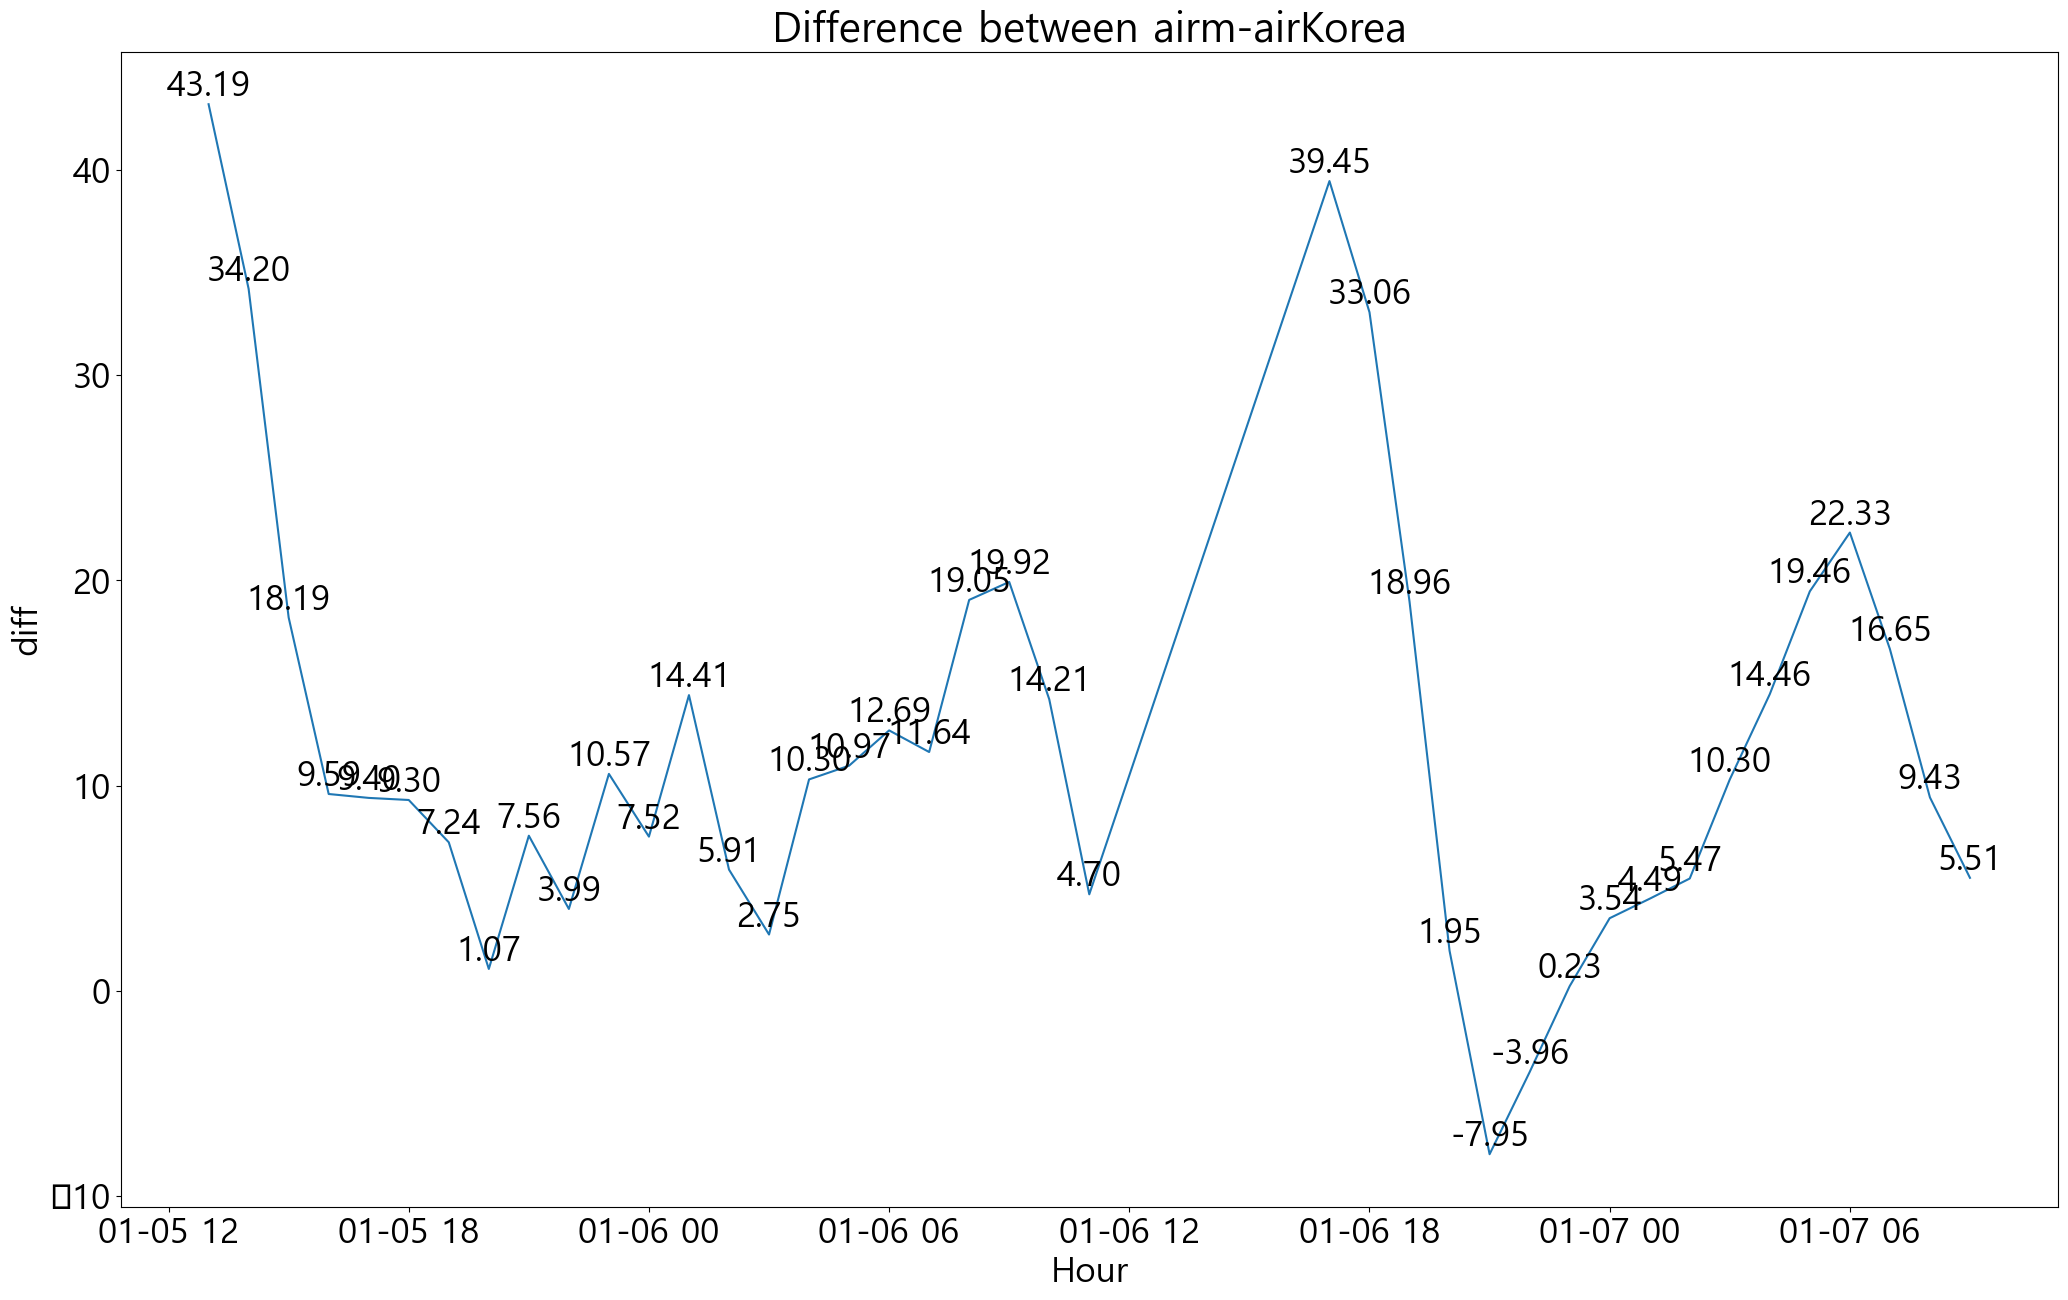

In [94]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,no,pm25,pm10,temp,humi,air_quality_label
reg_date,,,,,,
2023-01-05 13:00:00,1.052018e+06,79.241667,86.336667,12.248333,31.526667,매우 나쁨
2023-01-05 14:00:00,1.053216e+06,81.248333,87.963333,12.630000,33.886667,매우 나쁨
2023-01-05 15:00:00,1.054414e+06,79.238333,85.956667,13.111667,32.966667,매우 나쁨
2023-01-05 16:00:00,1.055611e+06,74.641667,80.926667,12.103333,35.328333,나쁨
2023-01-05 17:00:00,1.056810e+06,77.451667,84.515000,10.133333,40.006667,매우 나쁨
2023-01-05 18:00:00,1.057997e+06,84.350000,92.301667,8.185000,45.738333,매우 나쁨
2023-01-05 19:00:00,1.059127e+06,86.288333,94.118333,6.696667,48.796667,매우 나쁨
2023-01-05 20:00:00,1.060209e+06,89.120000,97.031667,5.711667,51.965000,매우 나쁨
2023-01-05 21:00:00,1.061261e+06,90.610000,98.620000,5.171667,54.241667,매우 나쁨


DatetimeIndex(['2023-01-05 20:00:00', '2023-01-06 21:00:00',
               '2023-01-06 22:00:00', '2023-01-06 23:00:00'],
              dtype='datetime64[ns]', name='reg_date', freq=None)

count    40.000000
mean     10.093669
std      10.890075
min      -9.905000
25%       3.332182
50%       7.995000
75%      15.087083
max      41.241667
Name: pm25, dtype: float64
10% value:  0.0049999999999954525


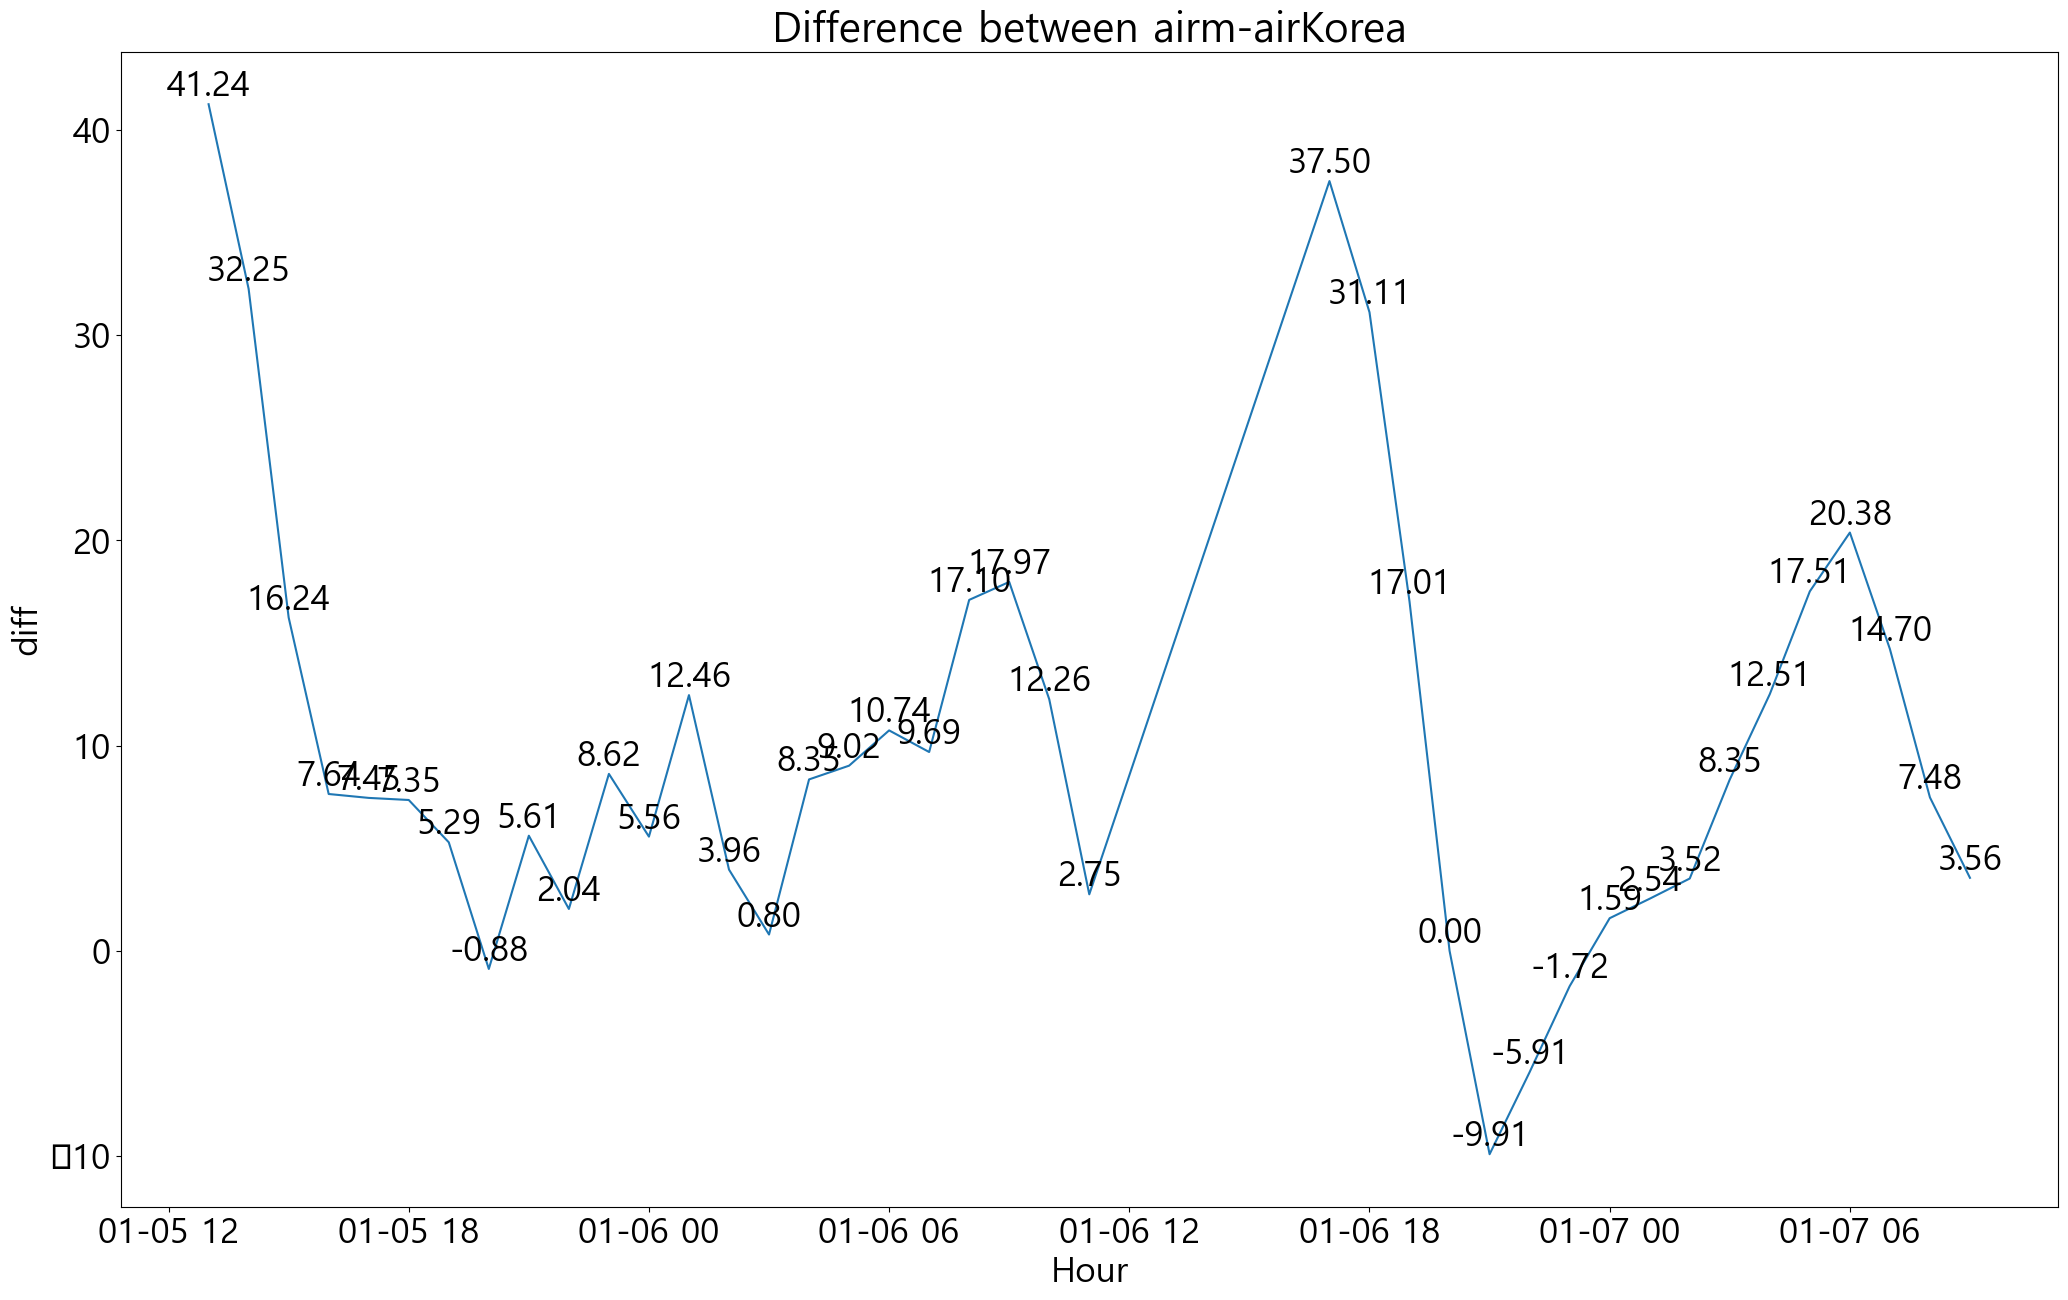

In [95]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

# arim_data의 수정 작업 10%대
arim_data_avg_1.pm25 -= 1.95

arim_data_avg_1['air_quality_label'] = arim_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(arim_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,no,pm25,pm10,temp,humi,air_quality_label
reg_date,,,,,,
2023-01-05 13:00:00,1.052018e+06,76.701667,86.336667,12.248333,31.526667,매우 나쁨
2023-01-05 14:00:00,1.053216e+06,78.708333,87.963333,12.630000,33.886667,매우 나쁨
2023-01-05 15:00:00,1.054414e+06,76.698333,85.956667,13.111667,32.966667,매우 나쁨
2023-01-05 16:00:00,1.055611e+06,72.101667,80.926667,12.103333,35.328333,나쁨
2023-01-05 17:00:00,1.056810e+06,74.911667,84.515000,10.133333,40.006667,나쁨
2023-01-05 18:00:00,1.057997e+06,81.810000,92.301667,8.185000,45.738333,매우 나쁨
2023-01-05 19:00:00,1.059127e+06,83.748333,94.118333,6.696667,48.796667,매우 나쁨
2023-01-05 20:00:00,1.060209e+06,86.580000,97.031667,5.711667,51.965000,매우 나쁨
2023-01-05 21:00:00,1.061261e+06,88.070000,98.620000,5.171667,54.241667,매우 나쁨


DatetimeIndex(['2023-01-05 20:00:00', '2023-01-05 22:00:00',
               '2023-01-06 03:00:00', '2023-01-06 20:00:00',
               '2023-01-06 21:00:00', '2023-01-06 22:00:00',
               '2023-01-06 23:00:00', '2023-01-07 00:00:00'],
              dtype='datetime64[ns]', name='reg_date', freq=None)

count    40.000000
mean      7.553669
std      10.890075
min     -12.445000
25%       0.792182
50%       5.455000
75%      12.547083
max      38.701667
Name: pm25, dtype: float64
20% value:  0.0016666666666651508


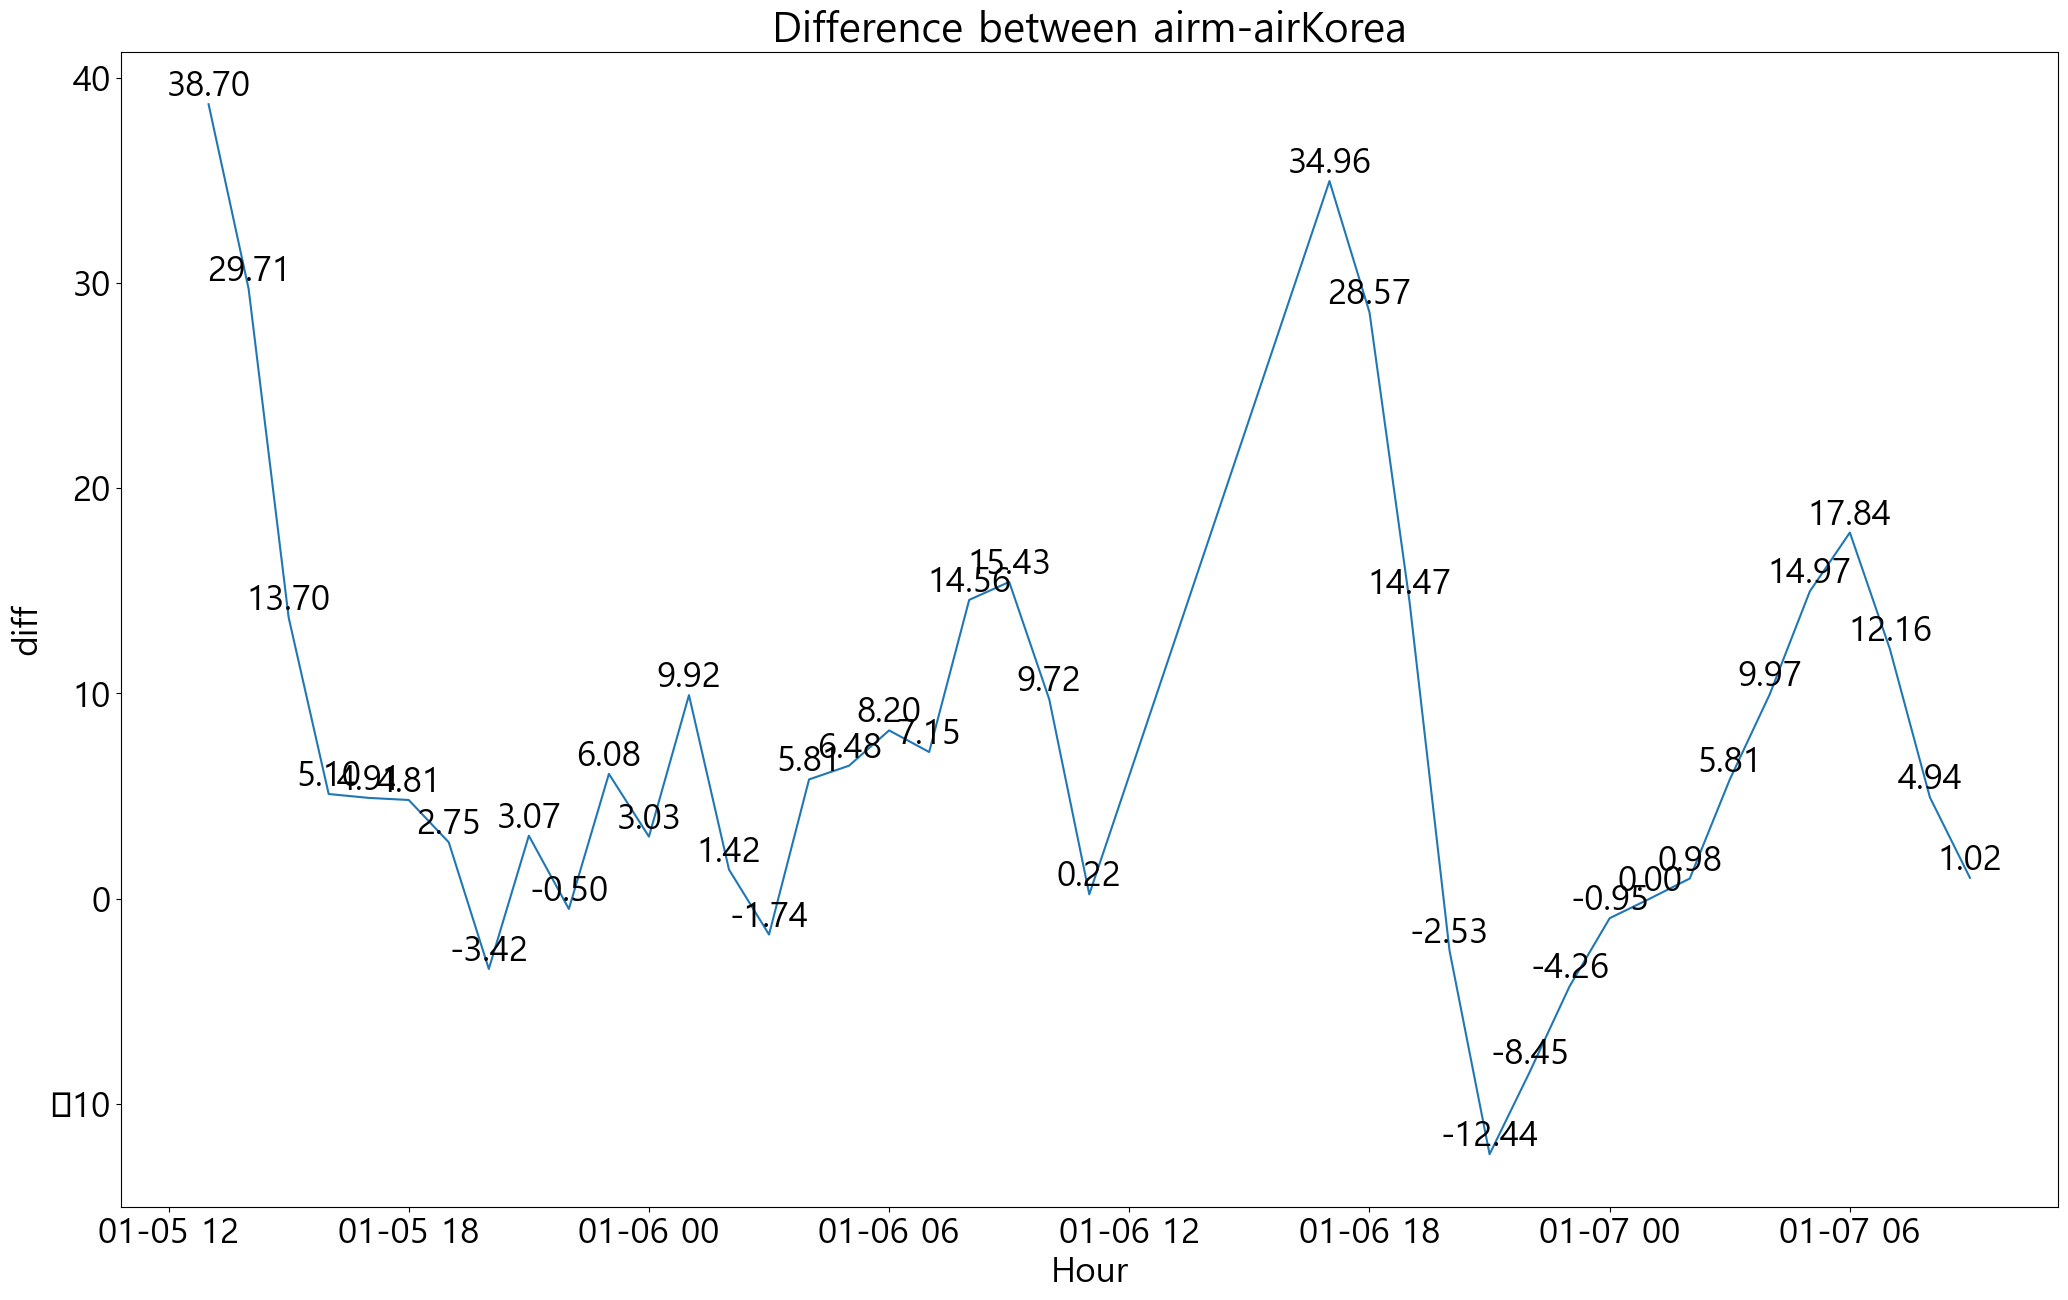

In [90]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

# arim_data의 수정 작업 20%대
arim_data_avg_1.pm25 -= 4.49

arim_data_avg_1['air_quality_label'] = arim_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(arim_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,no,pm25,pm10,temp,humi,air_quality_label
reg_date,,,,,,
2023-01-05 13:00:00,1.052018e+06,75.801667,86.336667,12.248333,31.526667,매우 나쁨
2023-01-05 14:00:00,1.053216e+06,77.808333,87.963333,12.630000,33.886667,매우 나쁨
2023-01-05 15:00:00,1.054414e+06,75.798333,85.956667,13.111667,32.966667,매우 나쁨
2023-01-05 16:00:00,1.055611e+06,71.201667,80.926667,12.103333,35.328333,나쁨
2023-01-05 17:00:00,1.056810e+06,74.011667,84.515000,10.133333,40.006667,나쁨
2023-01-05 18:00:00,1.057997e+06,80.910000,92.301667,8.185000,45.738333,매우 나쁨
2023-01-05 19:00:00,1.059127e+06,82.848333,94.118333,6.696667,48.796667,매우 나쁨
2023-01-05 20:00:00,1.060209e+06,85.680000,97.031667,5.711667,51.965000,매우 나쁨
2023-01-05 21:00:00,1.061261e+06,87.170000,98.620000,5.171667,54.241667,매우 나쁨


DatetimeIndex(['2023-01-05 20:00:00', '2023-01-05 22:00:00',
               '2023-01-06 03:00:00', '2023-01-06 11:00:00',
               '2023-01-06 20:00:00', '2023-01-06 21:00:00',
               '2023-01-06 22:00:00', '2023-01-06 23:00:00',
               '2023-01-07 00:00:00', '2023-01-07 01:00:00'],
              dtype='datetime64[ns]', name='reg_date', freq=None)

count    40.000000
mean      6.653669
std      10.890075
min     -13.345000
25%      -0.107818
50%       4.555000
75%      11.647083
max      37.801667
Name: pm25, dtype: float64
20% value:  -0.8983333333333405


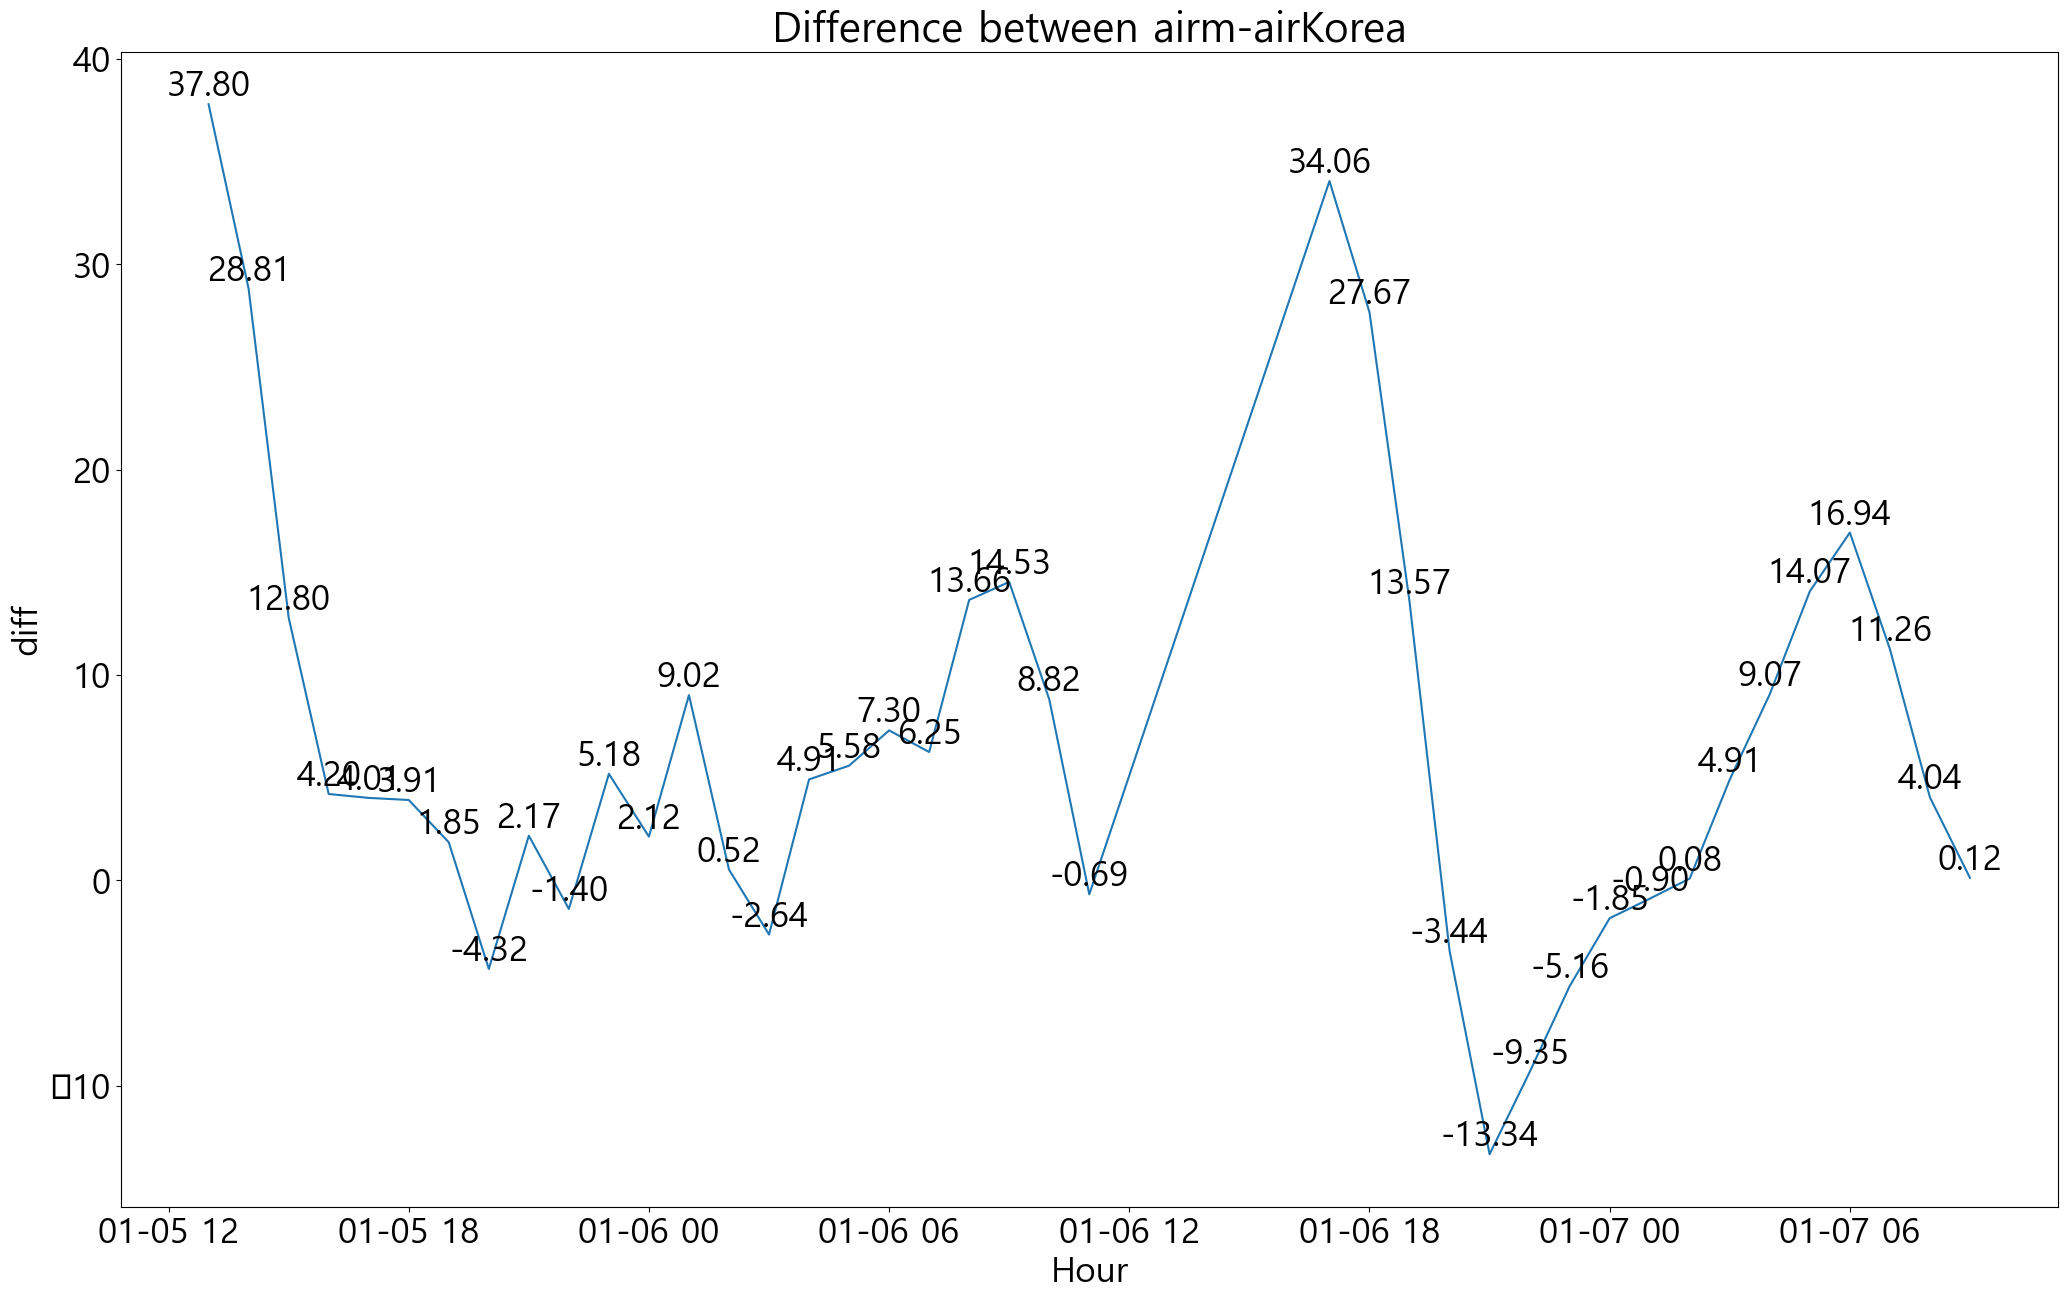

In [91]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

# arim_data의 수정 작업 25%대
arim_data_avg_1.pm25 -= 5.39

arim_data_avg_1['air_quality_label'] = arim_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(arim_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,pm10,pm25,air_quality_label
reg_date,,,


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pm25, dtype: float64
매우나쁨 농도가 없습니다.


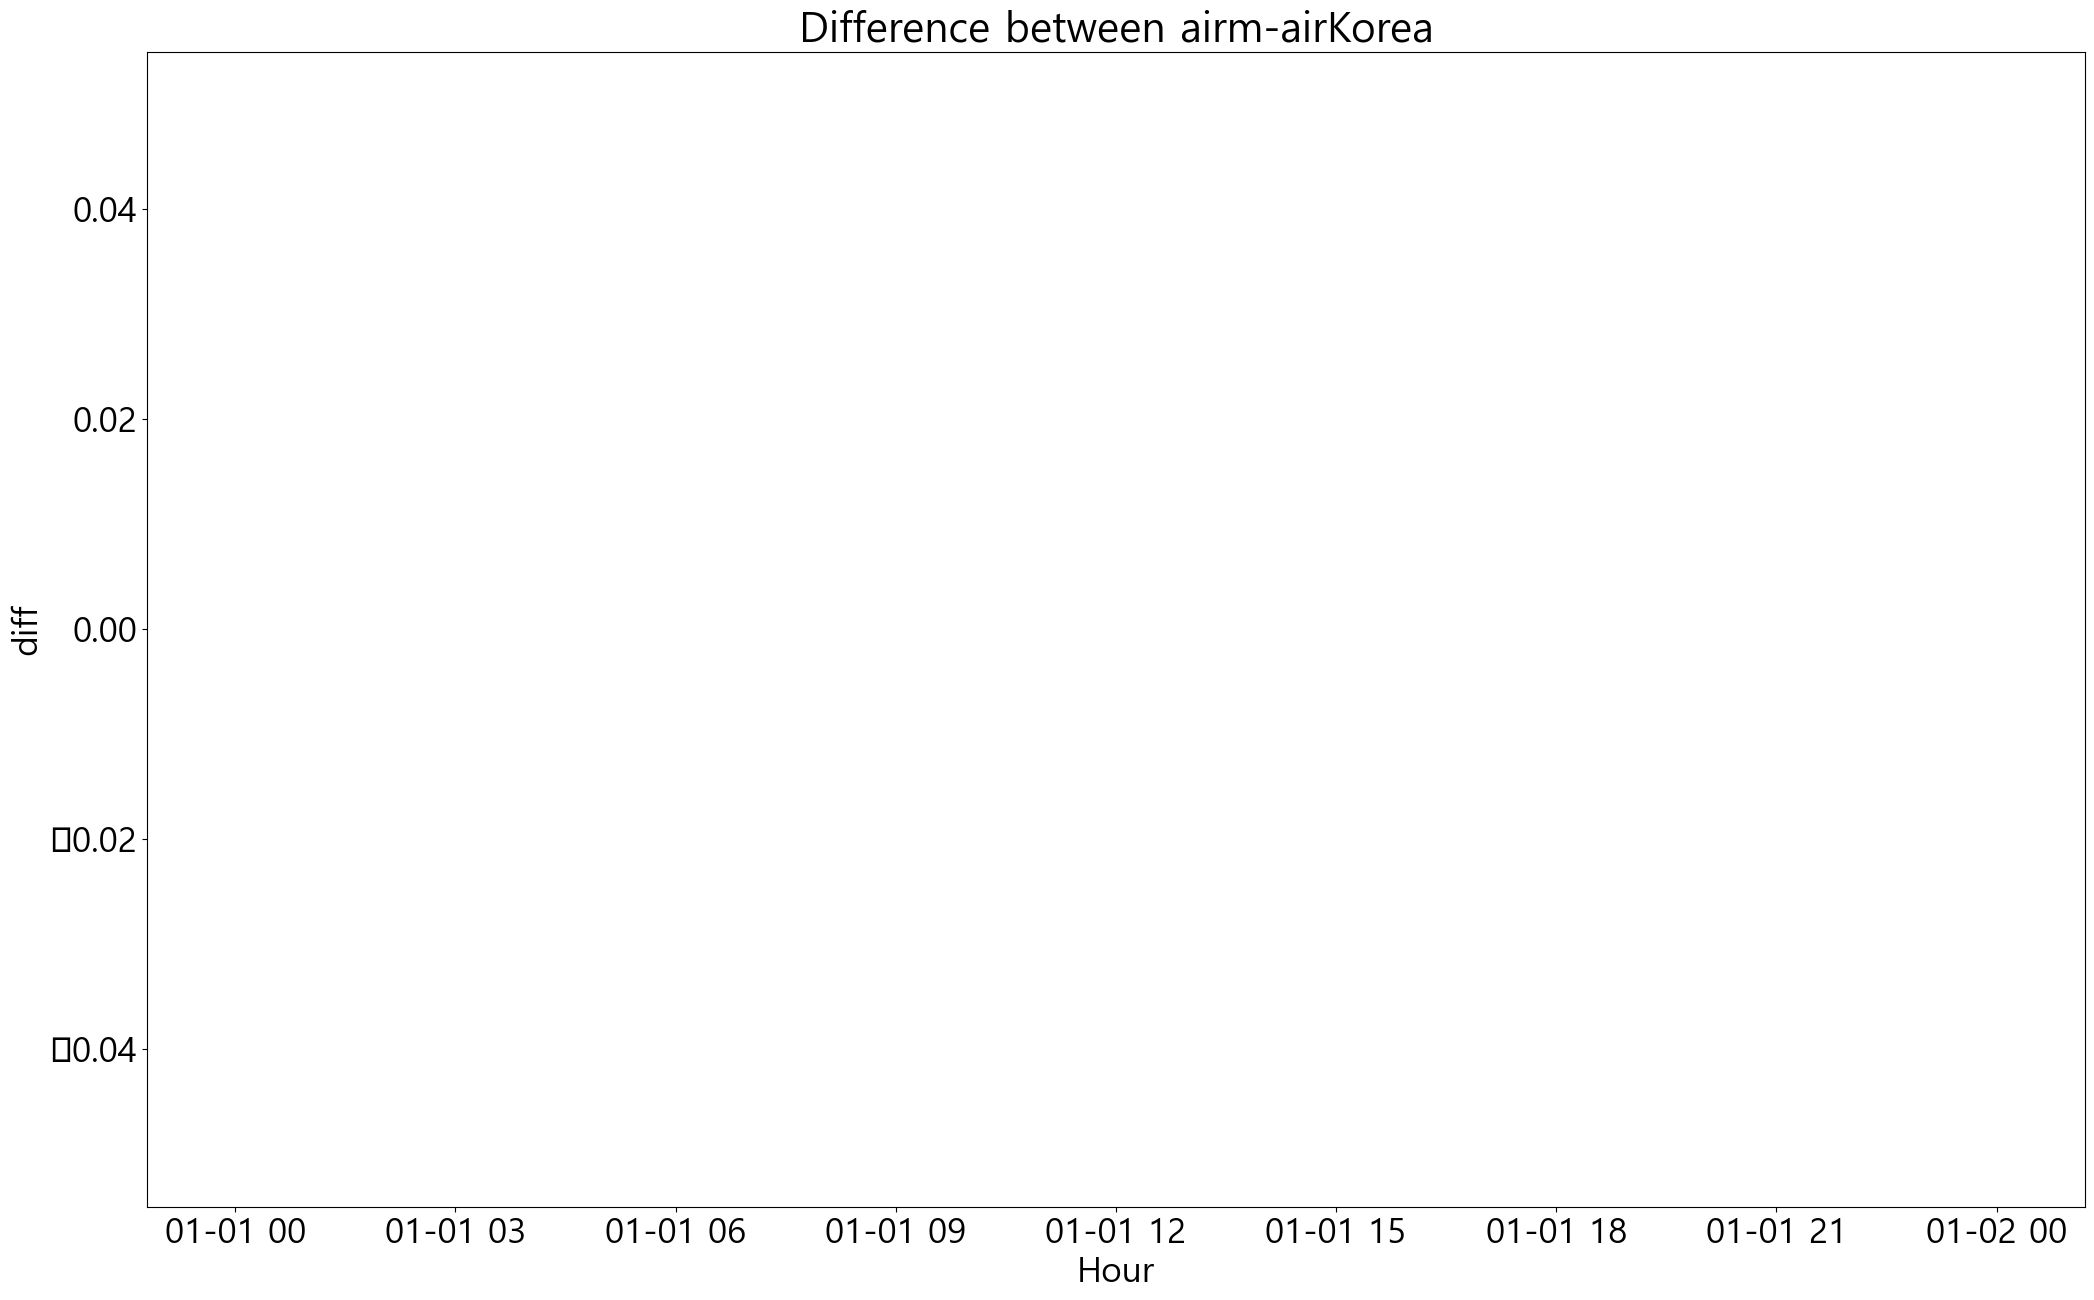

In [104]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)
    
difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)


,pm10,pm25,air_quality_label
reg_date,,,
2023-02-12 09:00:00,39.0,32.0,보통


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count     1.00
mean     72.86
std        NaN
min      72.86
25%      72.86
50%      72.86
75%      72.86
max      72.86
Name: pm25, dtype: float64
20% value:  72.85999999999999


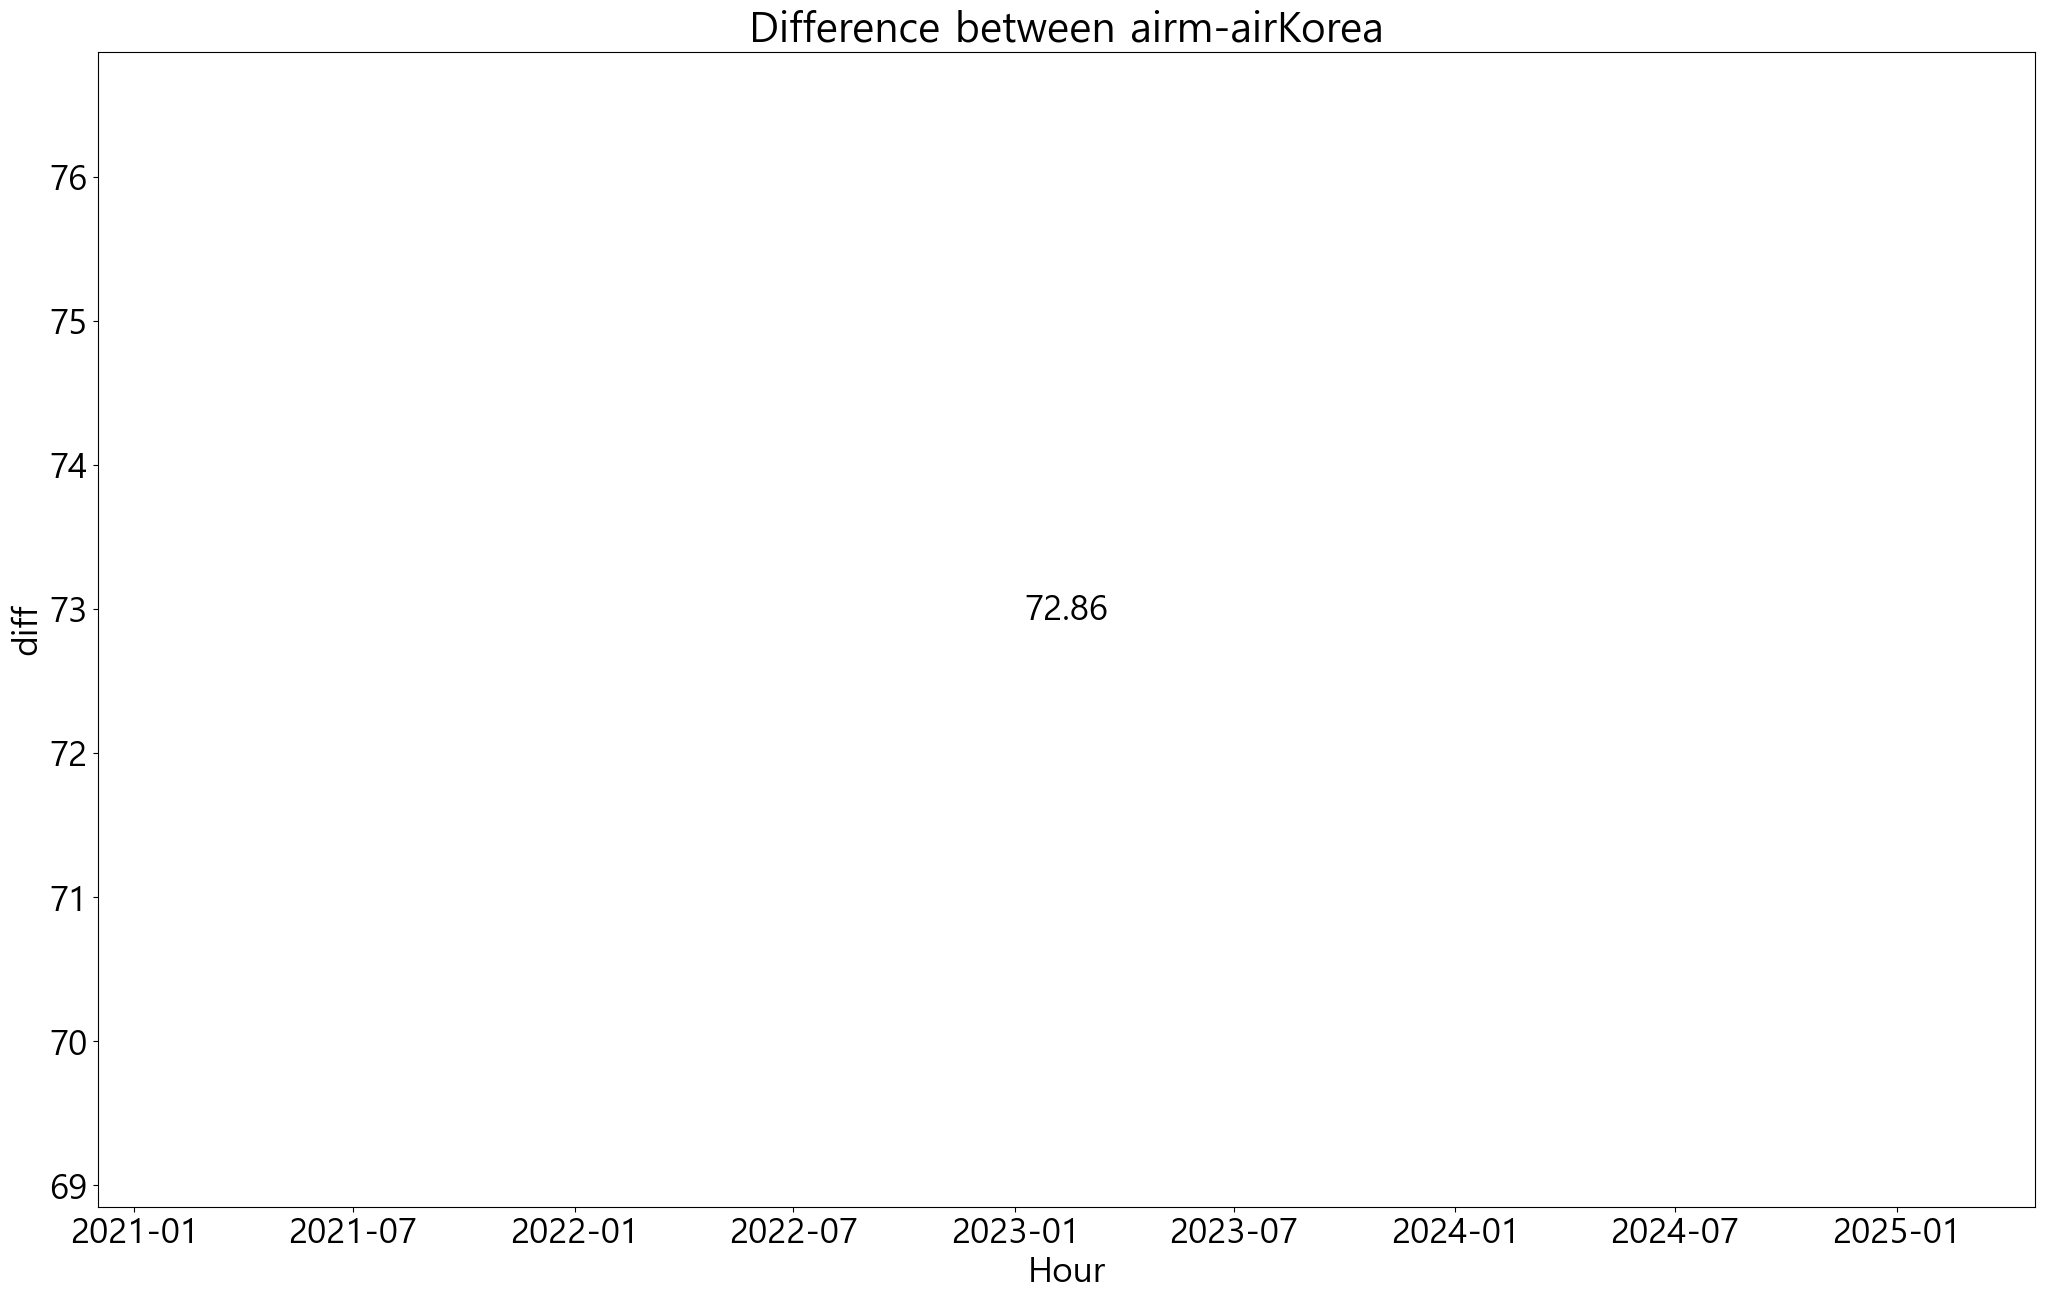

In [107]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,no,pm25,pm10,temp,humi,air_quality_label
reg_date,,,,,,
2023-02-28 11:00:00,2.899036e+06,135.238333,198.368333,21.903333,21.45,매우 나쁨


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count      1.000000
mean     101.238333
std             NaN
min      101.238333
25%      101.238333
50%      101.238333
75%      101.238333
max      101.238333
Name: pm25, dtype: float64
20% value:  101.23833333333334


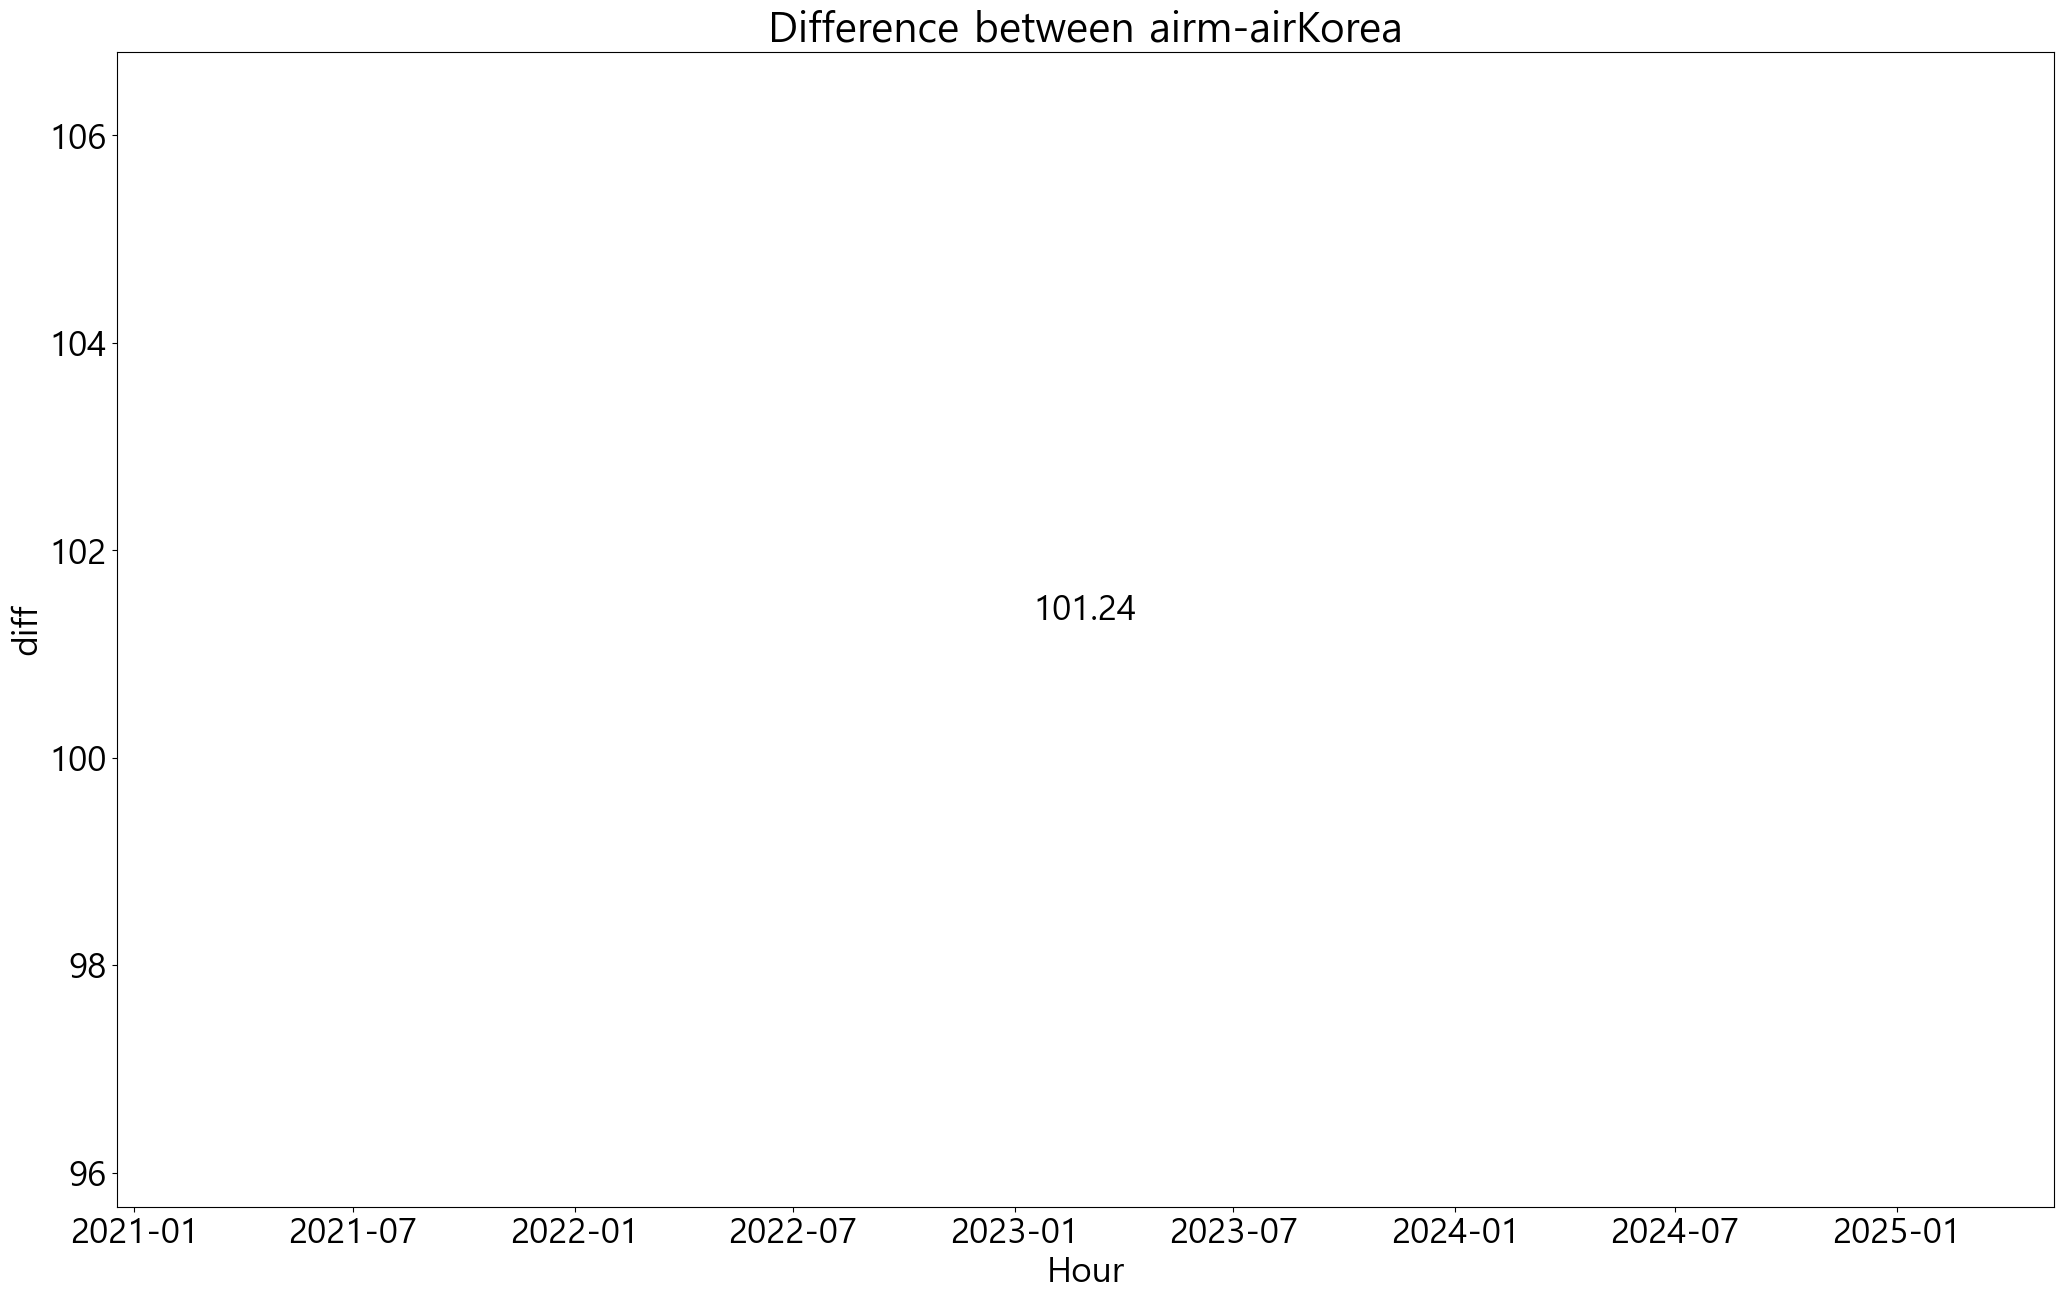

In [7]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

# arim_data의 수정 작업 20%대
arim_data_avg_1.pm25 -= 4.95

arim_data_avg_1['air_quality_label'] = arim_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(arim_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

## 3.1~3.15

,pm10,pm25,Unnamed: 3,air_quality_label
reg_date,,,,
2023-03-01 18:00:00,20.0,12.0,NaN,좋음
2023-03-04 20:00:00,92.0,59.0,NaN,나쁨
2023-03-04 21:00:00,97.0,64.0,NaN,나쁨
2023-03-04 22:00:00,102.0,67.0,NaN,나쁨
2023-03-04 23:00:00,107.0,69.0,NaN,나쁨
2023-03-05 00:00:00,107.0,72.0,NaN,나쁨
2023-03-05 01:00:00,106.0,77.0,NaN,매우 나쁨
2023-03-05 02:00:00,106.0,76.0,NaN,매우 나쁨
2023-03-05 03:00:00,102.0,75.0,NaN,나쁨


DatetimeIndex(['2023-03-05 01:00:00'], dtype='datetime64[ns]', name='reg_date', freq=None)

count    20.000000
mean     17.844333
std      18.406514
min      -0.955000
25%       8.497500
50%      10.879167
75%      18.788333
max      65.623333
Name: pm25, dtype: float64
20% value:  5.49499999999999


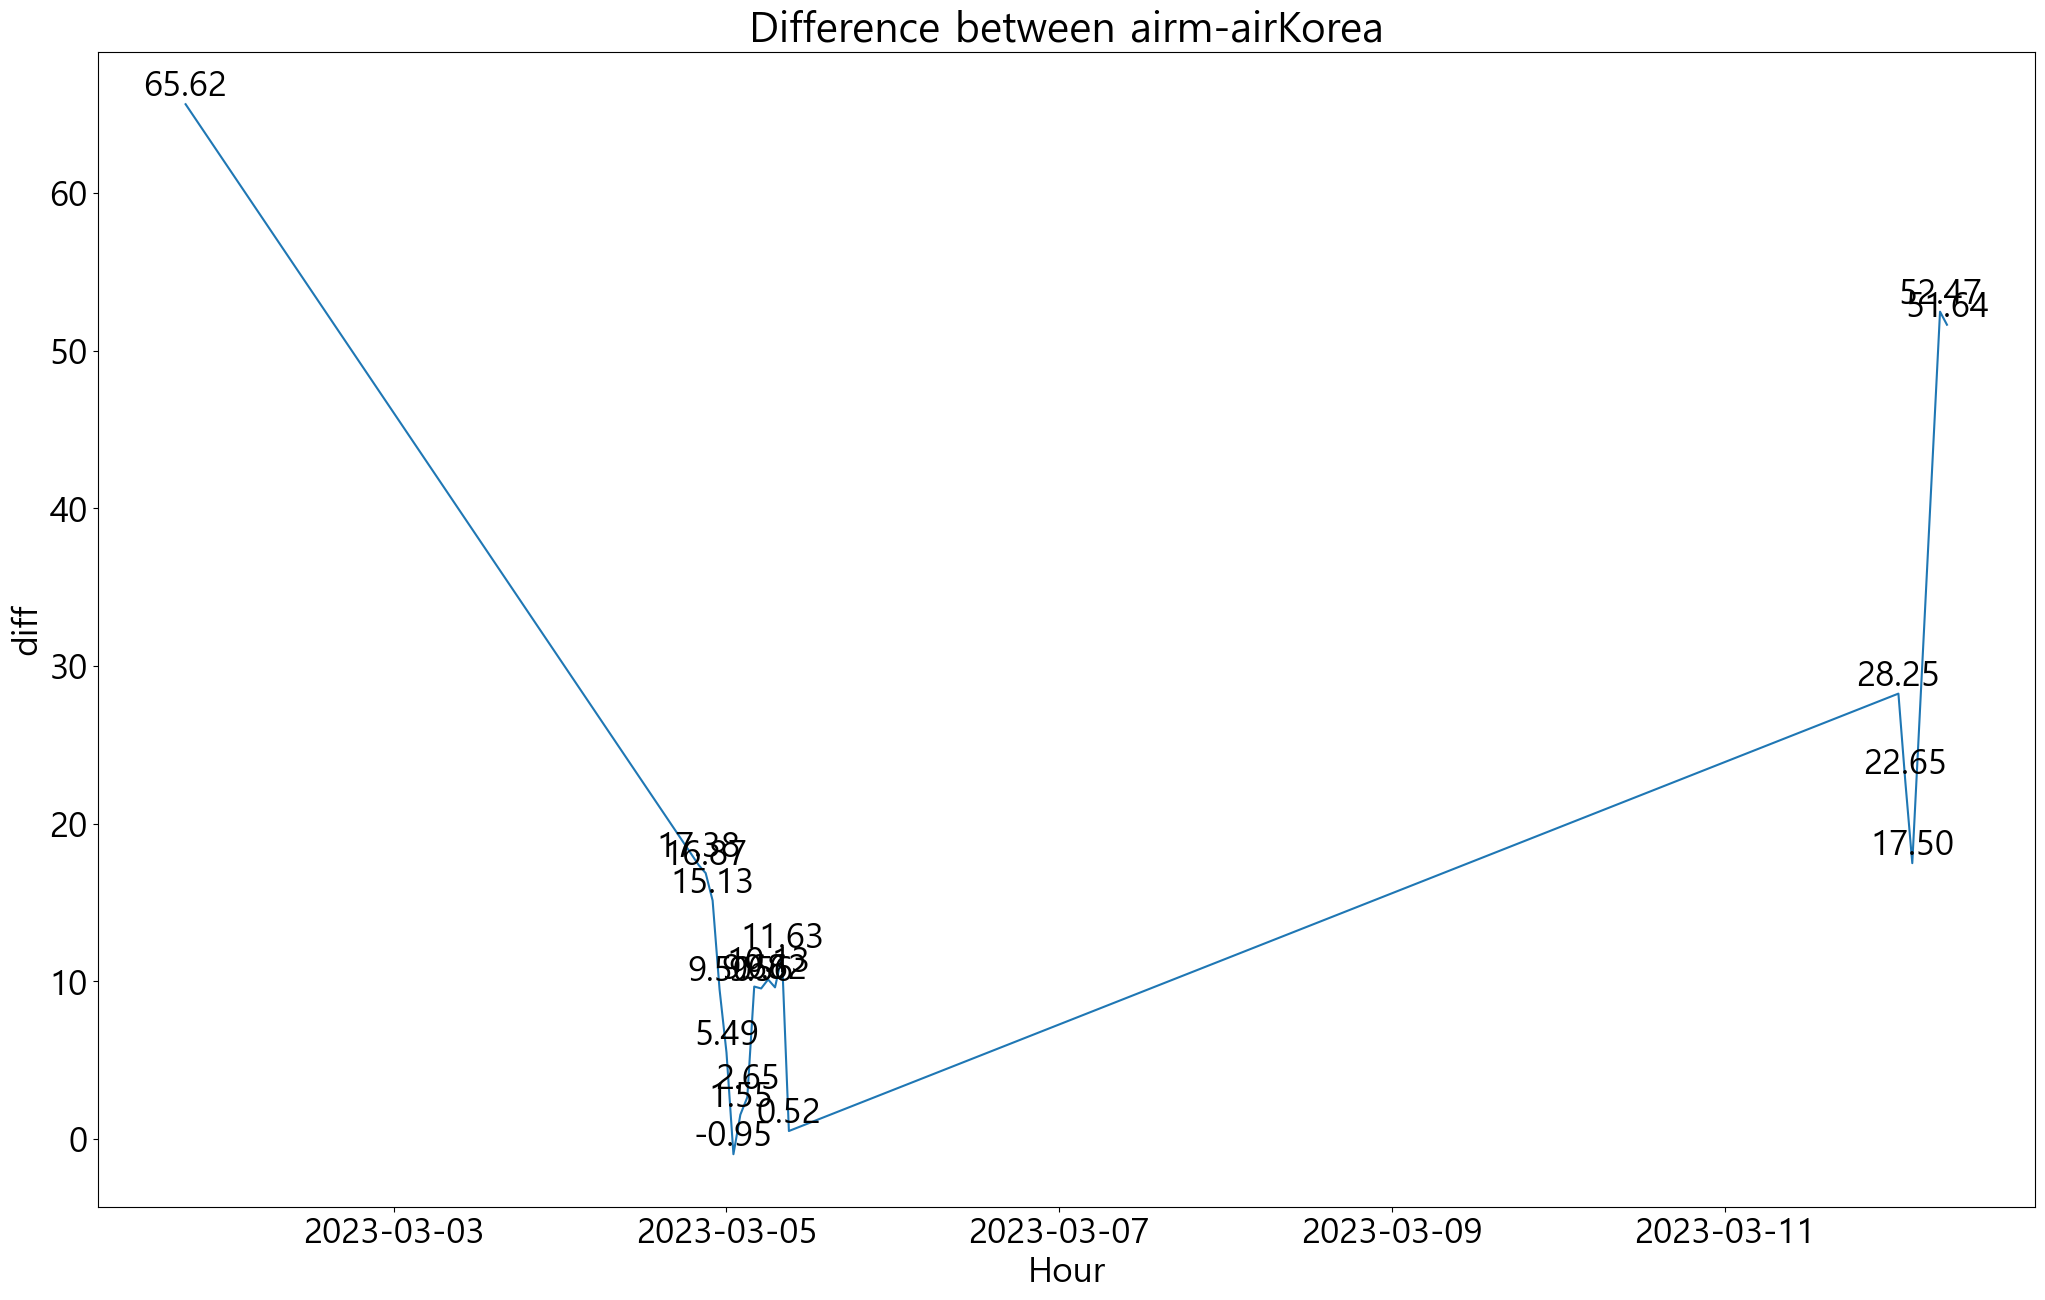

In [9]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_03.01~03.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.01~03.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,no,pm25,pm10,temp,humi,air_quality_label
reg_date,,,,,,
2023-03-01 18:00:00,2.937885e+06,72.673333,79.063333,14.025000,32.005000,나쁨
2023-03-04 20:00:00,3.026331e+06,71.425000,79.170000,12.833333,39.710000,나쁨
2023-03-04 21:00:00,3.027591e+06,75.918333,83.478333,11.338333,42.563333,매우 나쁨
2023-03-04 22:00:00,3.028849e+06,77.180000,84.636667,10.148333,45.110000,매우 나쁨
2023-03-04 23:00:00,3.030066e+06,73.548333,80.636667,9.091667,47.818333,나쁨
2023-03-05 00:00:00,3.031266e+06,72.545000,79.535000,8.308333,49.843333,나쁨
2023-03-05 01:00:00,3.032466e+06,71.095000,78.058333,7.628333,52.091667,나쁨
2023-03-05 02:00:00,3.033666e+06,72.601667,79.671667,7.021667,53.970000,나쁨
2023-03-05 03:00:00,3.034866e+06,72.703333,79.983333,6.441667,55.463333,나쁨


DatetimeIndex(['2023-03-05 01:00:00', '2023-03-05 02:00:00',
               '2023-03-05 03:00:00', '2023-03-05 09:00:00'],
              dtype='datetime64[ns]', name='reg_date', freq=None)

count    20.000000
mean     12.894333
std      18.406514
min      -5.905000
25%       3.547500
50%       5.929167
75%      13.838333
max      60.673333
Name: pm25, dtype: float64
20% value:  0.5449999999999875


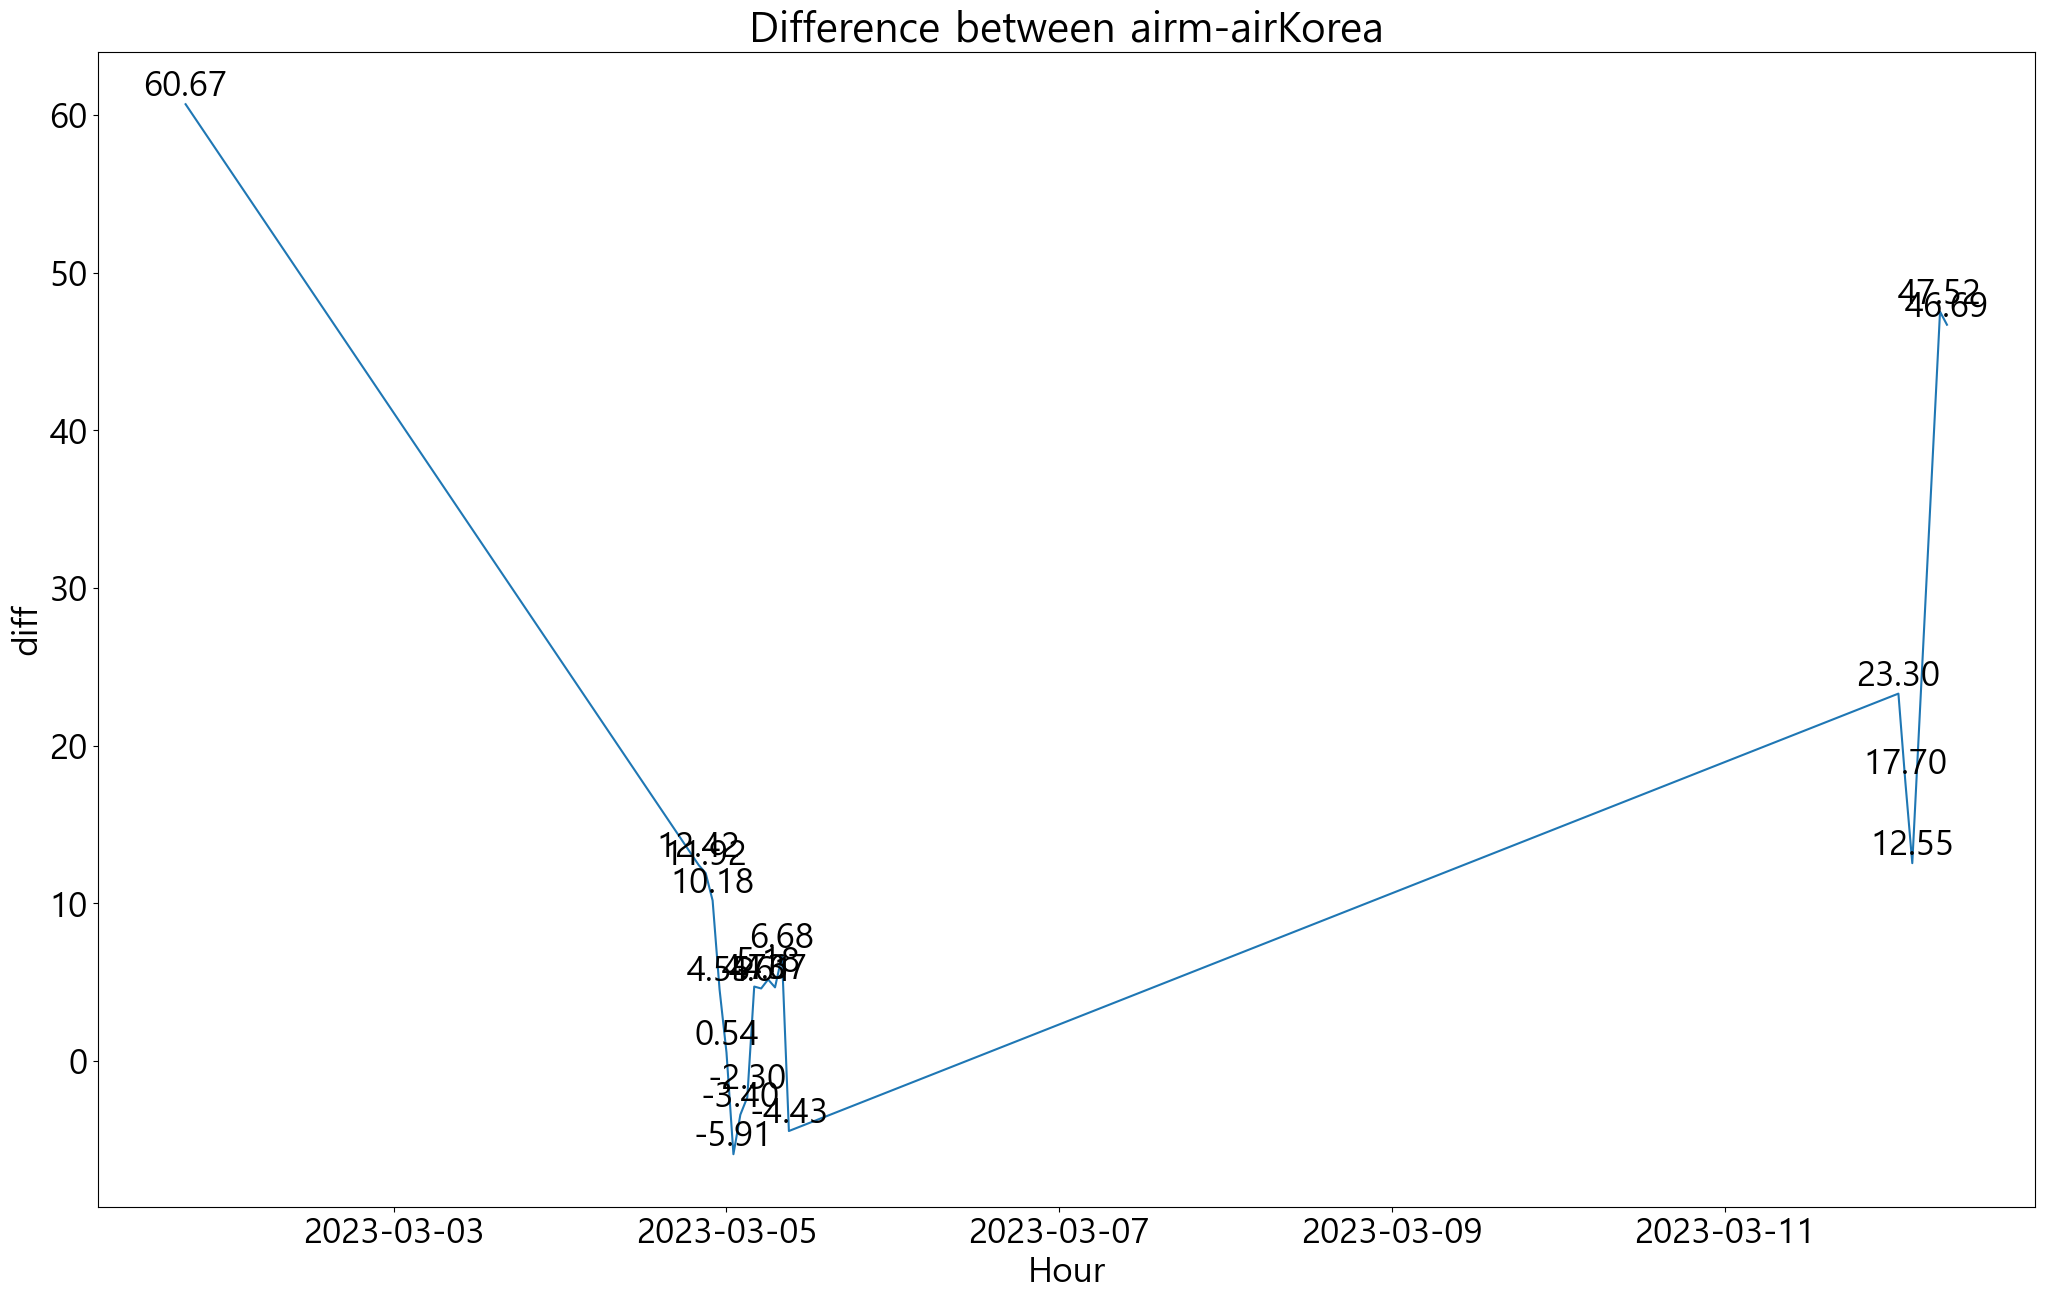

In [10]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_03.01~03.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.01~03.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

# arim_data의 수정 작업 20%대
arim_data_avg_1.pm25 -= 4.95

arim_data_avg_1['air_quality_label'] = arim_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(arim_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,pm10,pm25,Unnamed: 3,air_quality_label
reg_date,,,,


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pm25, dtype: float64
매우나쁨 농도가 없습니다.


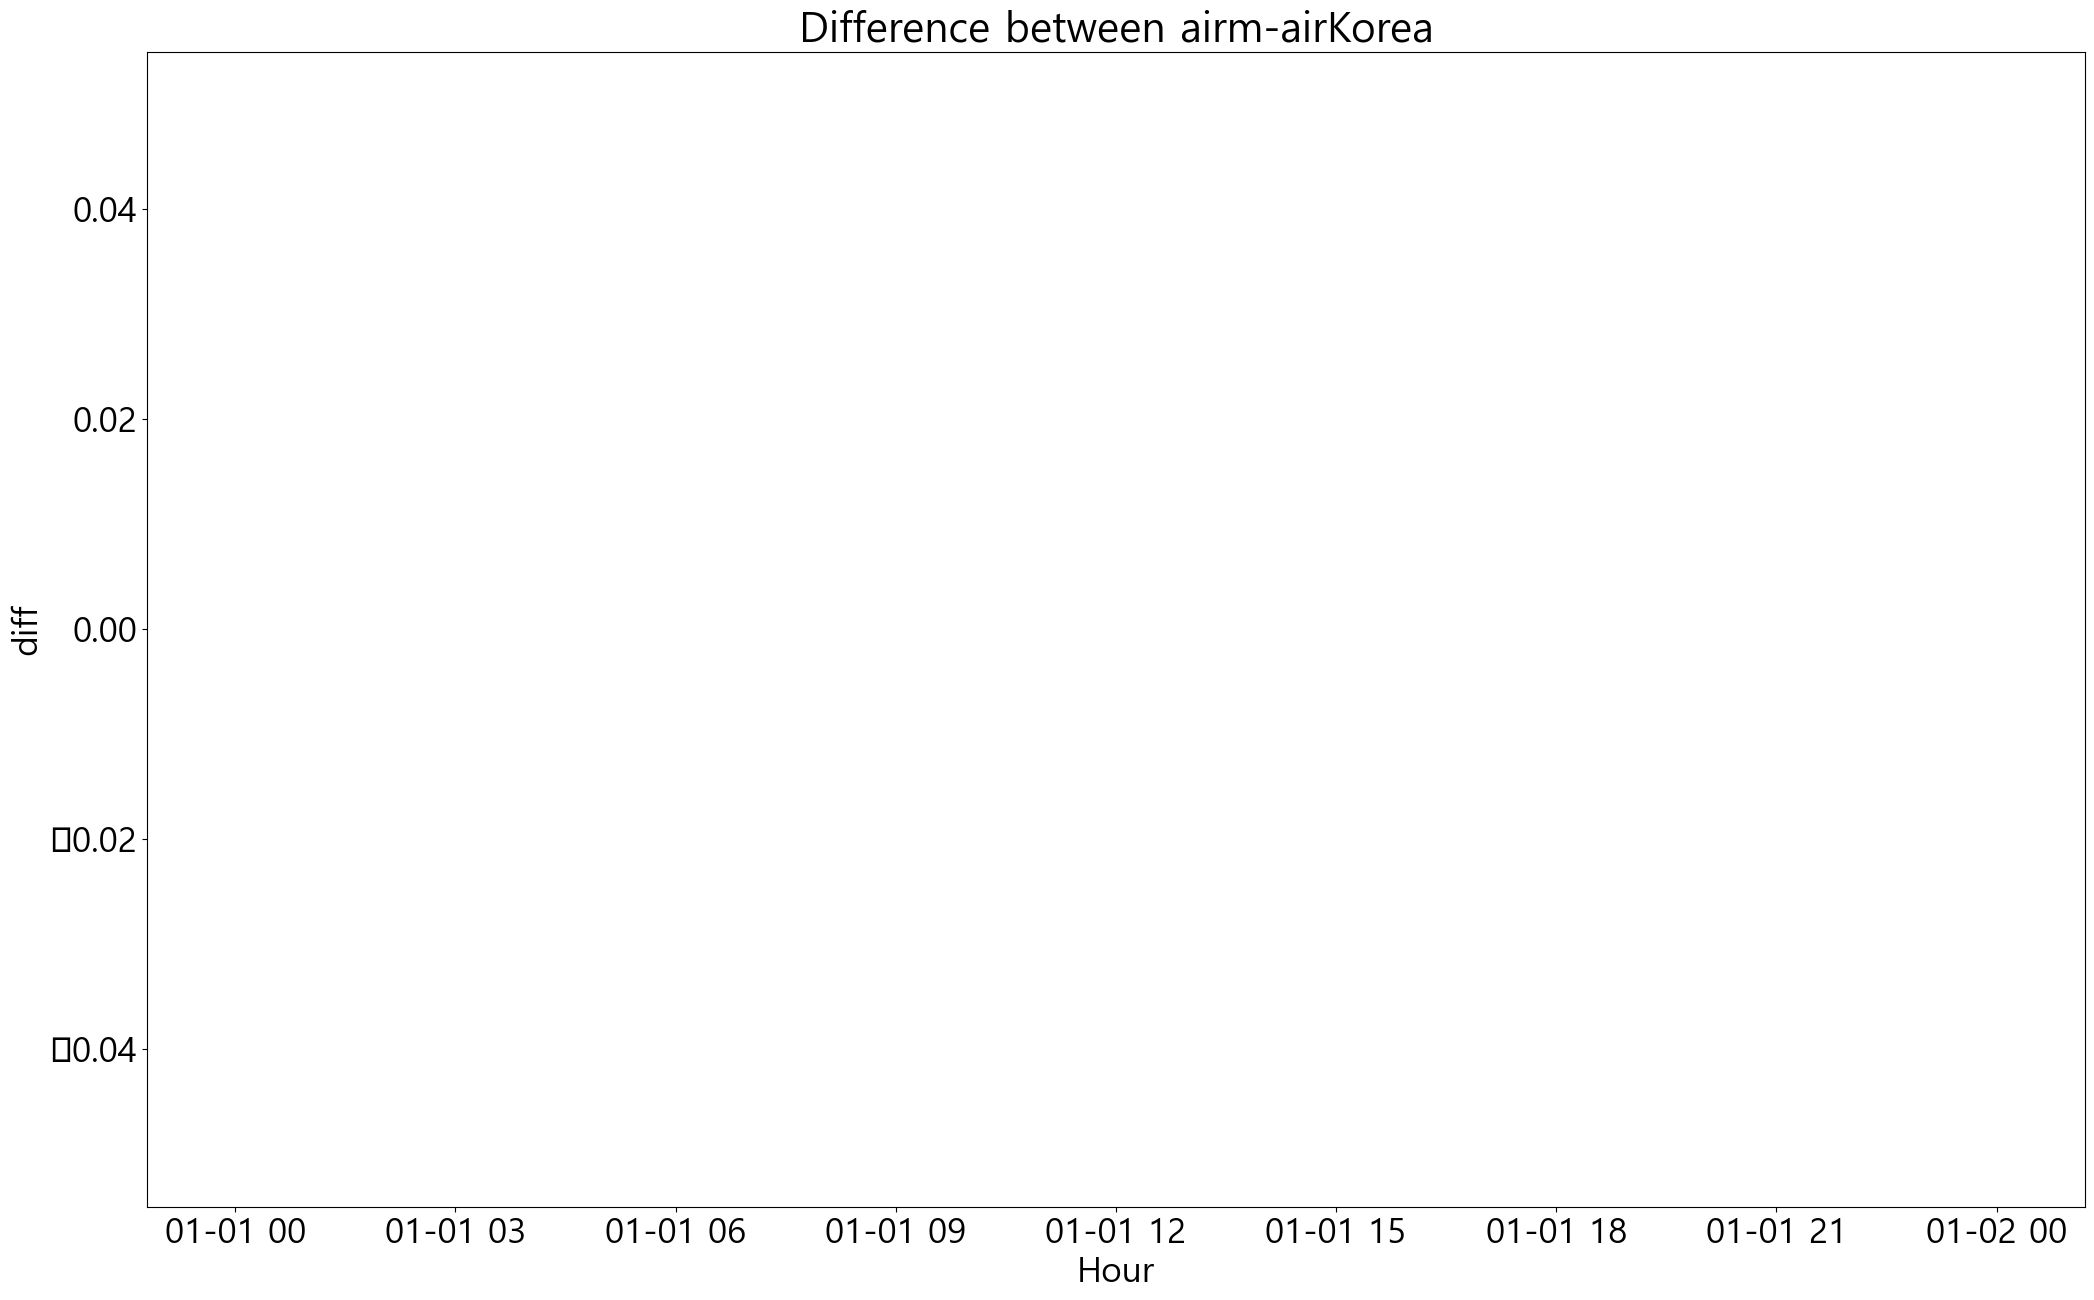

In [11]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_03.16~03.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.16~03.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,pm10,pm25,air_quality_label
reg_date,,,


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pm25, dtype: float64
매우나쁨 농도가 없습니다.


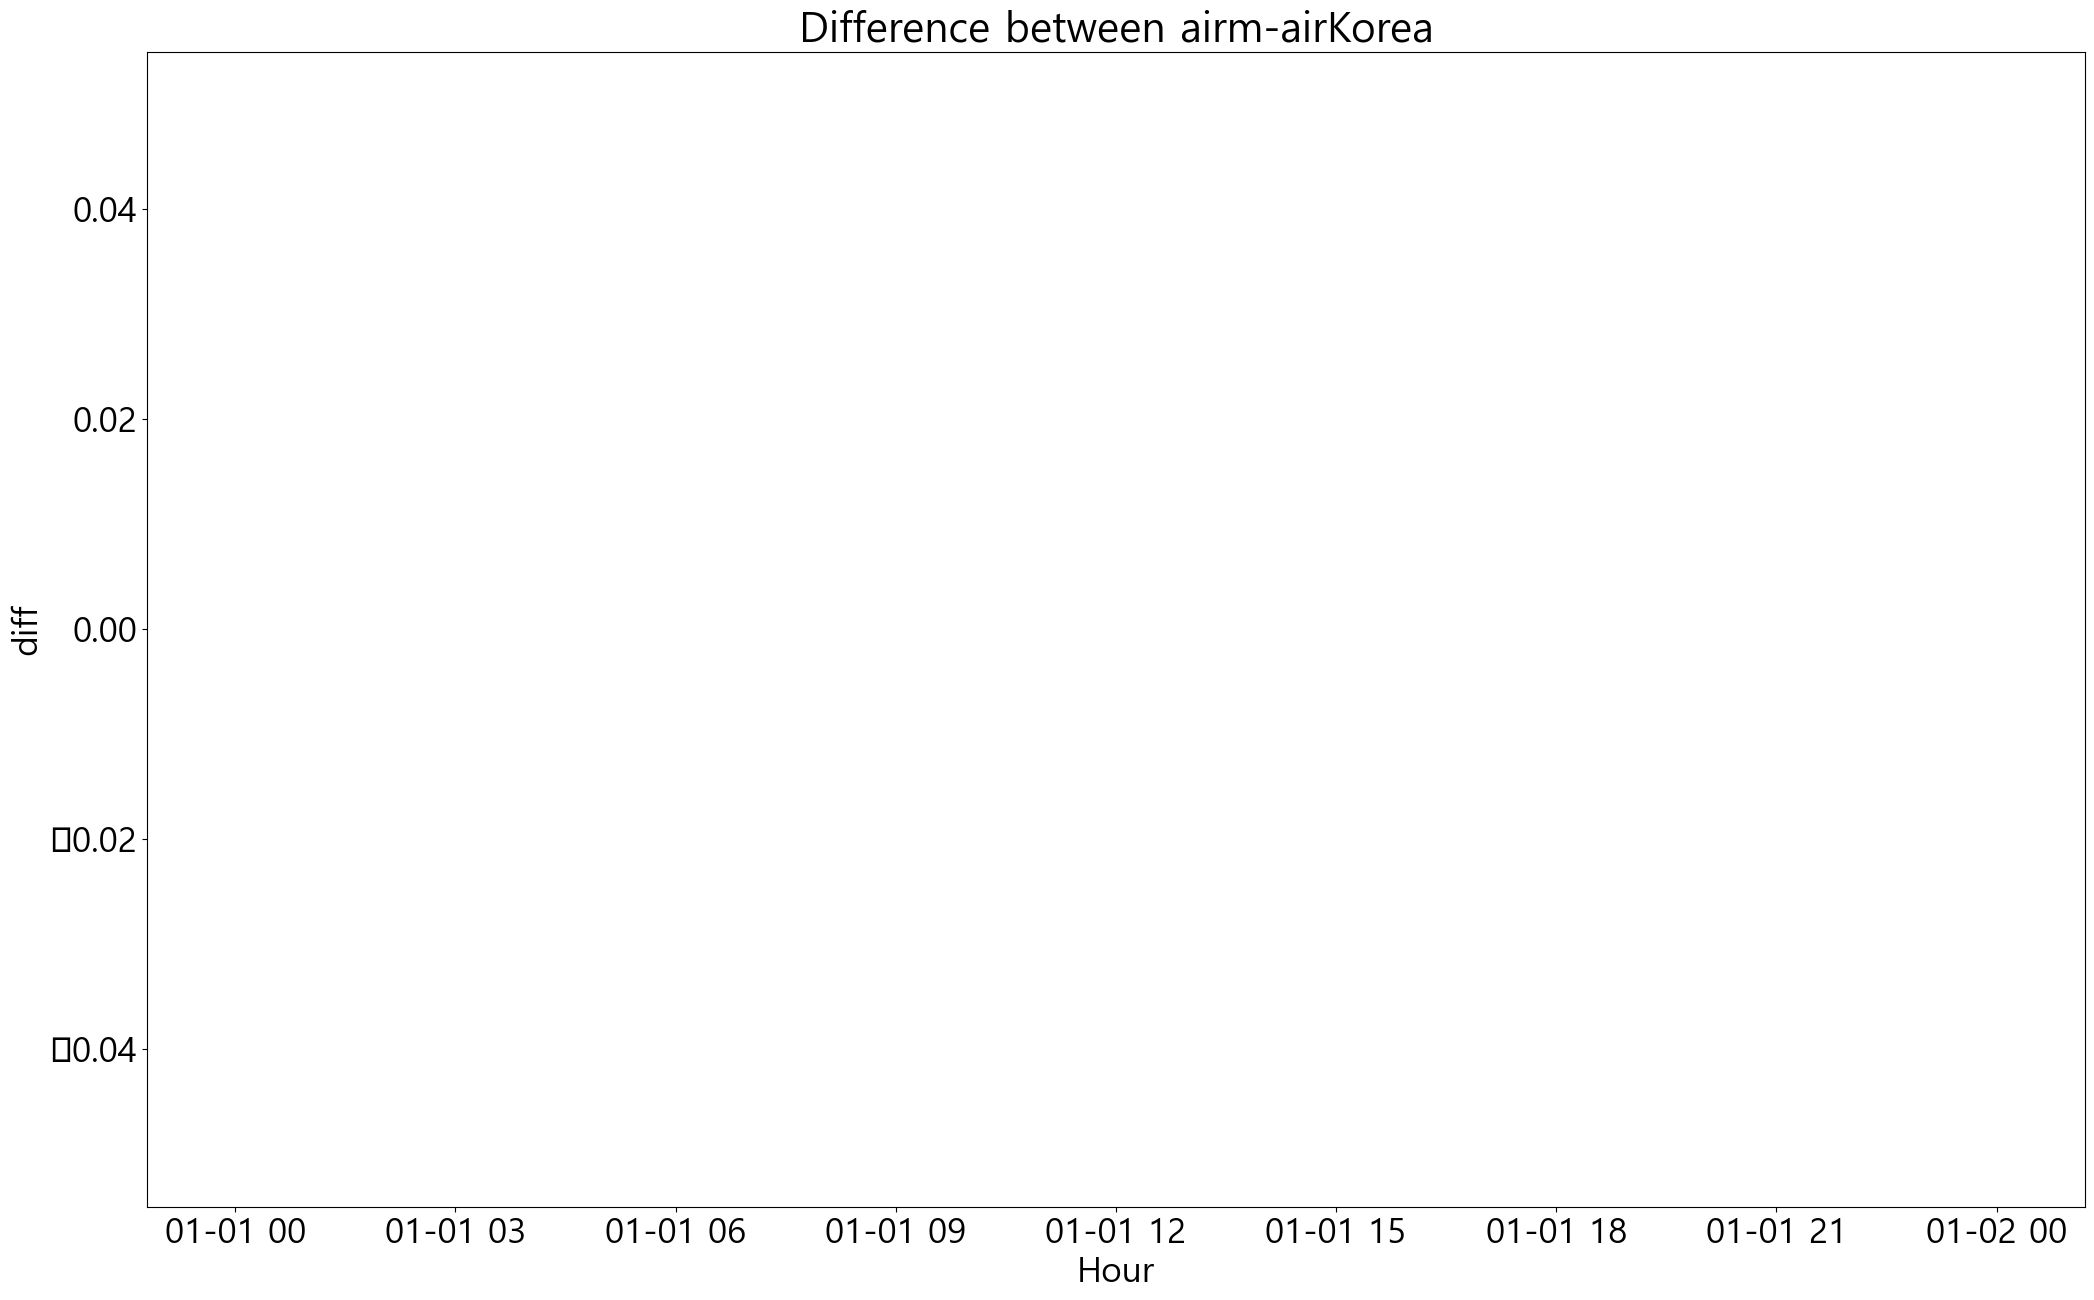

In [12]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_04.01~04.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_04.01~04.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,pm10,pm25,air_quality_label
reg_date,,,


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pm25, dtype: float64
매우나쁨 농도가 없습니다.


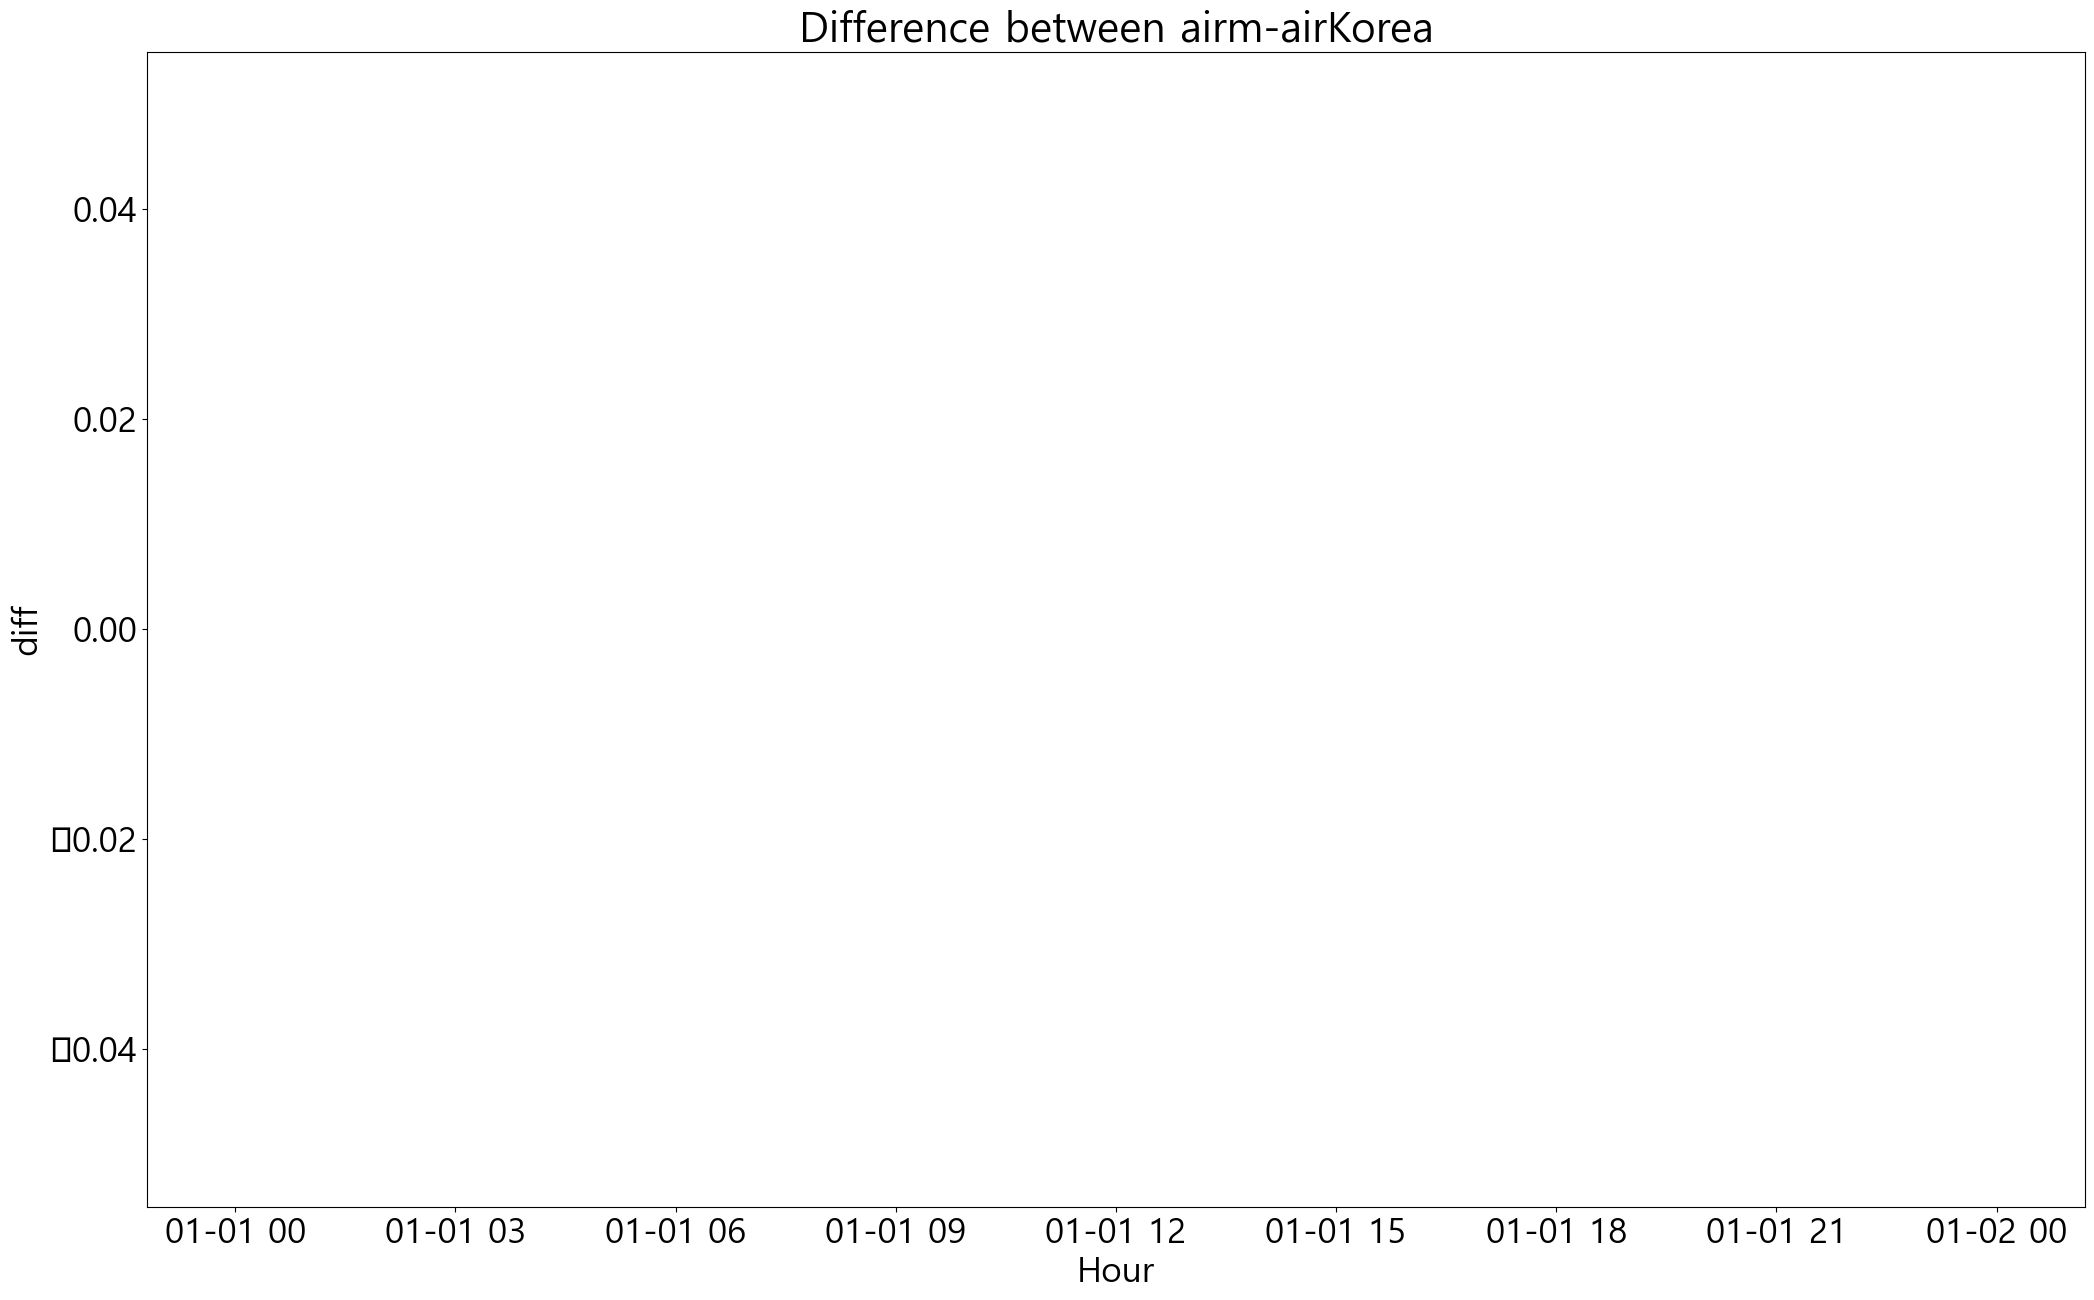

In [13]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_04.16~04.30.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_04.16~04.30.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,pm10,pm25,air_quality_label
reg_date,,,
2022-12-09 15:00:00,27.0,10.0,좋음


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count      1.000000
mean     257.091525
std             NaN
min      257.091525
25%      257.091525
50%      257.091525
75%      257.091525
max      257.091525
Name: pm25, dtype: float64
20% value:  257.09152542372885


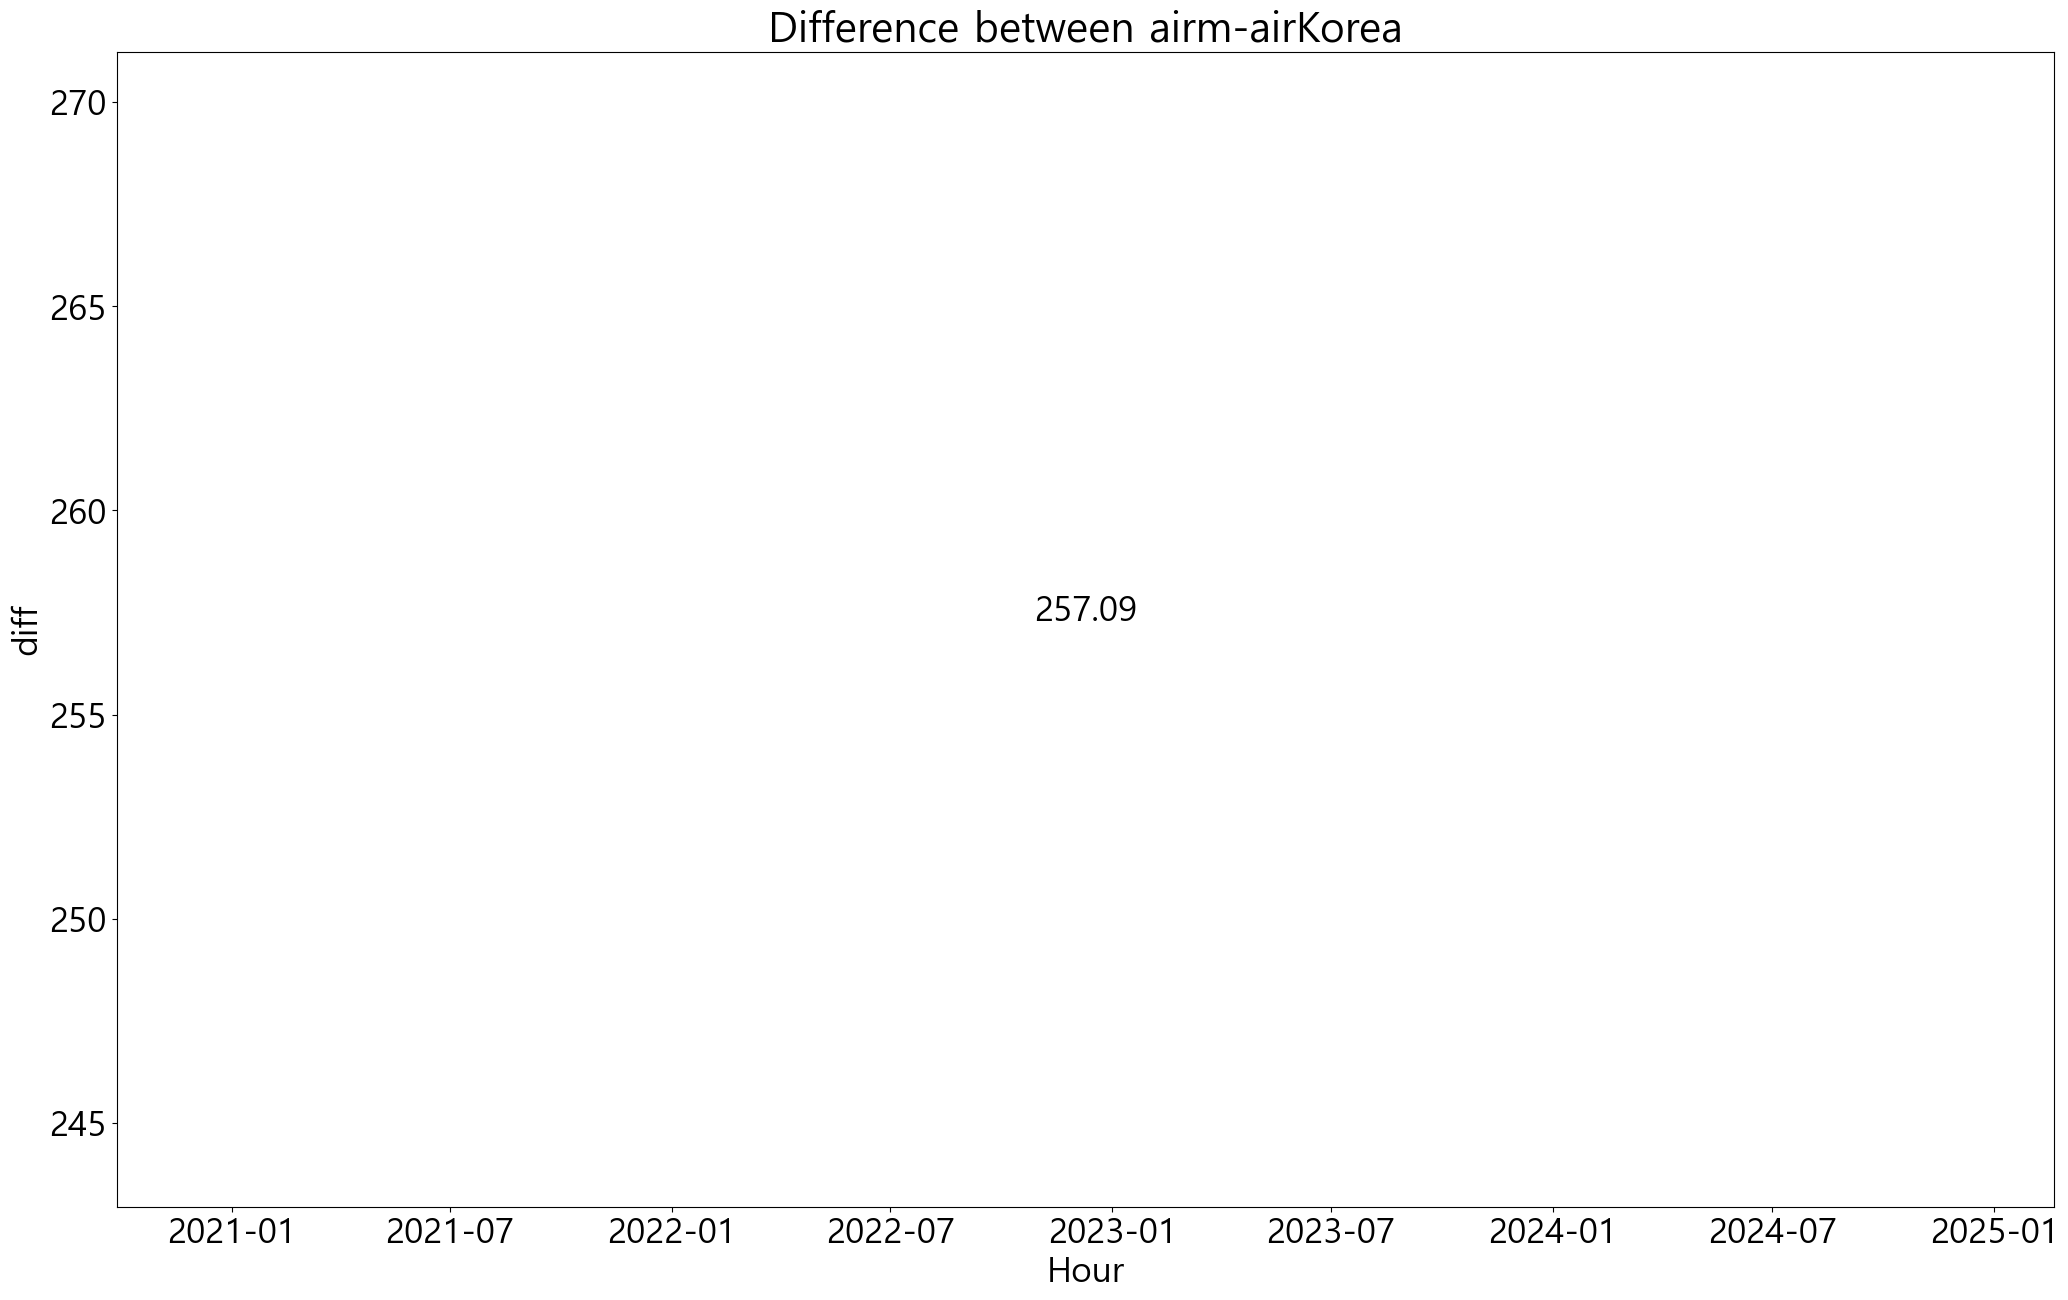

In [14]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_12.01~12.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_12.01~12.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

,pm10,pm25,air_quality_label
reg_date,,,


DatetimeIndex([], dtype='datetime64[ns]', name='reg_date', freq='H')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pm25, dtype: float64
매우나쁨 농도가 없습니다.


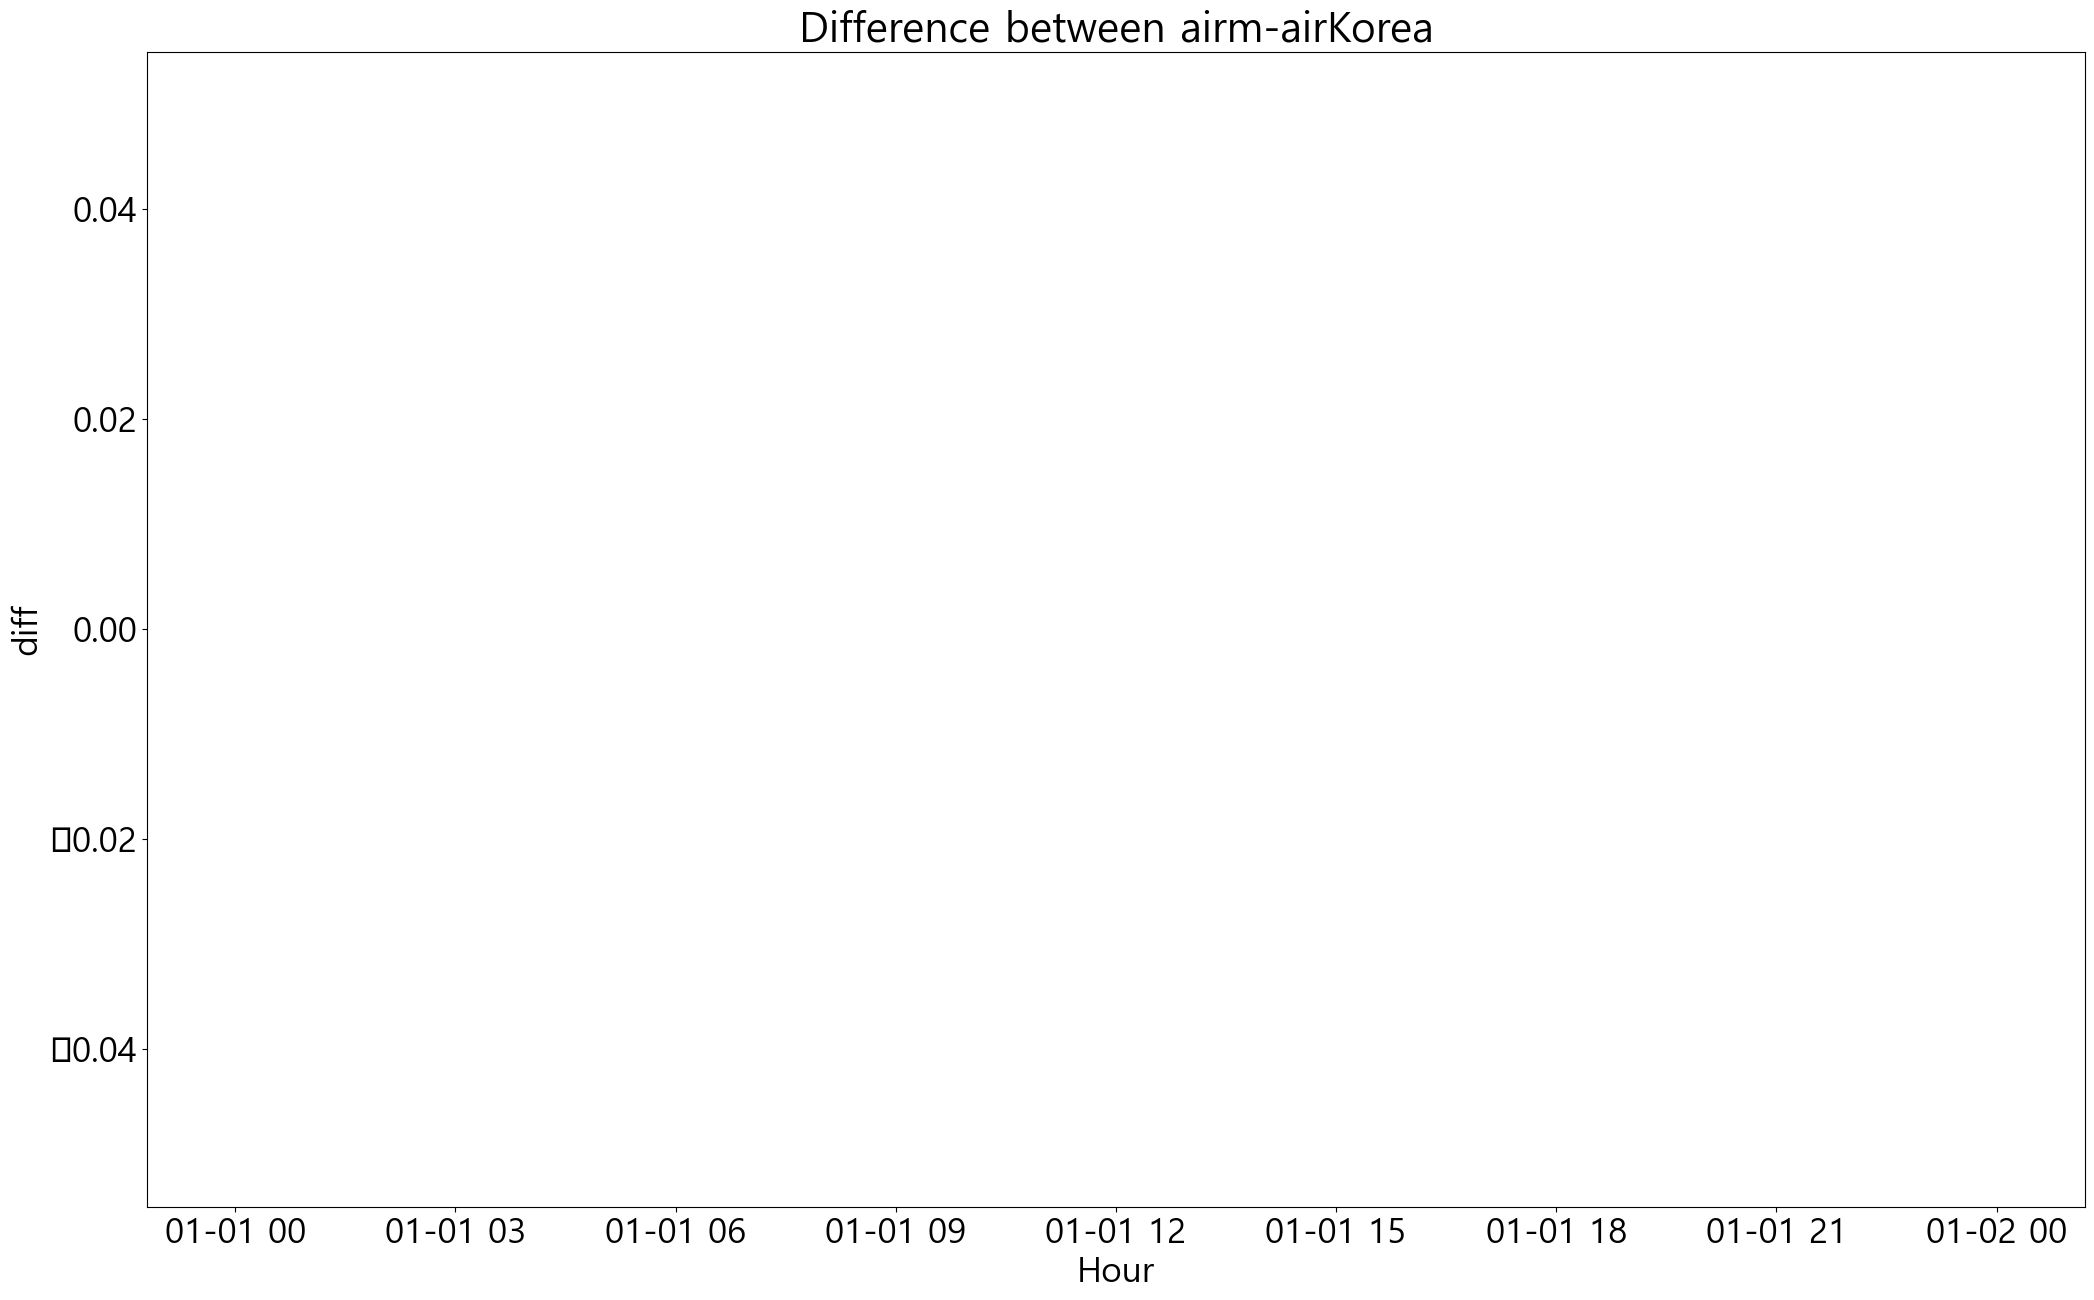

In [15]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_12.16~12.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_12.16~12.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg_1 = arim_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]
airKorea_data_avg_1 = airKorea_data_avg.loc[arim_data_avg.loc[arim_data_avg.pm25 >= 76].index]

# 아래는 airKorea가 Nan인 60이상의 데이터 또는 76 이상의 데이터를 소거하는 과정
nan_idx = airKorea_data_avg_1.pm25.isnull()
valid_idx = ~nan_idx

arim_data_avg_1 = arim_data_avg_1.loc[valid_idx]
airKorea_data_avg_1 = airKorea_data_avg_1.loc[valid_idx]

airKorea_data_avg_1['air_quality_label'] = airKorea_data_avg_1['pm25'].apply(lambda x: air_quality_label(x))

display(airKorea_data_avg_1)

difference(arim_data_avg_1.pm25, airKorea_data_avg_1.pm25)

- peak to peak를 찾아서 확인해본 결과 값의 차이는 없다.

In [45]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(arim_peak_idx)
print(airKorea_peak_idx)

2023-01-06 09:00:00
2023-01-07 10:00:00


In [46]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_1/OA2001_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상대동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(arim_peak_idx)
print(airKorea_peak_idx)

2023-01-06 09:00:00
2023-01-06 10:00:00


In [47]:
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(airKorea_peak_idx)

2023-01-07 01:00:00


# 1.16~1.31

In [48]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(arim_peak_idx)
print(airKorea_peak_idx)

2023-01-24 00:00:00
2023-01-24 03:00:00


In [54]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


arim_data_avg = arim_data_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']
airKorea_data_avg = airKorea_data_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']


arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(arim_peak_idx)
print(airKorea_peak_idx)

2023-01-19 09:00:00
2023-01-19 09:00:00


In [49]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상대동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(arim_peak_idx)
print(airKorea_peak_idx)

2023-01-19 09:00:00
2023-01-19 11:00:00


In [53]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상대동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-01-20 01:00:00':'2023-01-31 23:00:00']
airKorea_data_avg = airKorea_data_avg.loc['2023-01-20 01:00:00':'2023-01-31 23:00:00']

arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(arim_peak_idx)
print(airKorea_peak_idx)

2023-01-24 00:00:00
2023-01-20 10:00:00


In [50]:
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print(airKorea_peak_idx)

2023-01-19 10:00:00


In [39]:
display(airKorea_data_avg_1.loc['2023-01-06 21:00:00'])
display(arim_data_avg_1.loc['2023-01-06 21:00:00'])

pm10    105.0
pm25     90.0
Name: 2023-01-06 21:00:00, dtype: float64

no      1.089199e+06
pm25    8.204500e+01
pm10    8.875500e+01
temp    7.171667e+00
humi    4.720833e+01
Name: 2023-01-06 21:00:00, dtype: float64

In [40]:
display(airKorea_data_avg_1.loc['2023-01-06 22:00:00'])
display(arim_data_avg_1.loc['2023-01-06 22:00:00'])

pm10    107.0
pm25     90.0
Name: 2023-01-06 22:00:00, dtype: float64

no      1.090359e+06
pm25    8.604333e+01
pm10    9.257167e+01
temp    6.901667e+00
humi    4.933833e+01
Name: 2023-01-06 22:00:00, dtype: float64

In [41]:
display(airKorea_data_avg_1.loc['2023-01-06 20:00:00'])
display(arim_data_avg_1.loc['2023-01-06 20:00:00'])

pm10    99.0
pm25    81.0
Name: 2023-01-06 20:00:00, dtype: float64

no      1.087996e+06
pm25    8.295500e+01
pm10    9.058333e+01
temp    6.473333e+00
humi    4.569333e+01
Name: 2023-01-06 20:00:00, dtype: float64

### 요약하자면, peak의 차이는 없다 -> 5km의 거리에 따른 미세먼지 흐름도에 이 데이터는  차이가 존재하지 않는다.